# import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# turn warning off in a cell jupyter notebook 

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

# Load datasets into Python

In [3]:
df = pd.read_csv ('telcom_data (2).xlsx - Sheet1.csv')

In [4]:
df

Bearer Id          Start  Start ms            End  End ms  \
0       1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0   
1       1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0   
2       1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0   
3       1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0   
4       1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0   
...              ...            ...       ...            ...     ...   
149996  7.277830e+18   4/29/19 7:28     451.0   4/30/19 6:02   214.0   
149997  7.349880e+18   4/29/19 7:28     483.0  4/30/19 10:41   187.0   
149998  1.311450e+19   4/29/19 7:28     283.0  4/30/19 10:46   810.0   
149999  1.311450e+19   4/29/19 7:28     696.0  4/30/19 10:40   327.0   
150000           NaN            NaN       NaN            NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0             9.16457E+15  ...          15854611.0          2501332.00   
1                 L77566A  ...          20247395.0         19111729.00   
2                 D42335A  ...          19725661.0         14699576.00   
3                 T21824A  ...          21388122.0         15146643.00   
4                 D88865A  ...          15259380.0         18962873.00   
...                   ...  ...                 ...                 ...   
149996            D20434A  ...          16191667.0         11763428.00   
149997            D10223C  ...          13877234.0          8288284.00   
149998            T51102A  ...          22660510.0          1855903.00   
149999            L88342B  ...           8817106.0          8305402.00   
150000                NaN  ...          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0               8198936.00          9656251.00        278082303.0   
1              18338413.00         17227132.00        608750074.0   
2              17587794.00          6163408.00        229584621.0   
3              13994646.00          1097942.00        799538153.0   
4              17124581.00           415218.00        527707248.0   
...                    ...                 ...                ...   
149996         17883703.00         19678161.00        526609673.0   
149997         19350146.00         21293148.00        626893062.0   
149998          9963942.00          5065760.00        553539484.0   
149999          3322253.00         13172589.00        352536971.0   
150000         11626851.72         11001754.82        422044702.6   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07       171744450.0      8.814393e+06   
1            1.170709e+06       526904238.0      1.505514e+07   
2            3.956300e+05       410692588.0      4.215763e+06   
3            1.084972e+07       749039933.0      1.279728e+07   
4            3.529801e+06       550709500.0      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06         3264510.0      1.348742e+07   
149997       4.735033e+06       712180387.0      2.457758e+06   
149998       1.339432e+07       121100856.0      1.131473e+07   
149999   

# data structures using .info(),.head(),.tail() and shape

In [5]:
df.head()

Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15  ...   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A  ...   
2  2.082003e+14   3.376063e+10  3.528151e+13            D42335A  ...   
3  2.082014e+14   3.375034e+10  3.535661e+13            T21824A  ...   
4  2.082014e+14   3.369980e+10  3.540701e+13            D88865A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2501332.0           8198936.0   
1          20247395.0          19111729.0          18338413.0   
2          19725661.0          14699576.0          17587794.0   
3          21388122.0          15146643.0          13994646.0   
4          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

In [6]:
df.tail()

Bearer Id         Start  Start ms            End  End ms  \
149996  7.277830e+18  4/29/19 7:28     451.0   4/30/19 6:02   214.0   
149997  7.349880e+18  4/29/19 7:28     483.0  4/30/19 10:41   187.0   
149998  1.311450e+19  4/29/19 7:28     283.0  4/30/19 10:46   810.0   
149999  1.311450e+19  4/29/19 7:28     696.0  4/30/19 10:40   327.0   
150000           NaN           NaN       NaN            NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
149996            D20434A  ...          16191667.0         11763428.00   
149997            D10223C  ...          13877234.0          8288284.00   
149998            T51102A  ...          22660510.0          1855903.00   
149999            L88342B  ...           8817106.0          8305402.00   
150000                NaN  ...          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
149996         17883703.00         19678161.00        526609673.0   
149997         19350146.00         21293148.00        626893062.0   
149998          9963942.00          5065760.00        553539484.0   
149999          3322253.00         13172589.00        352536971.0   
150000         11626851.72         11001754.82        422044702.6   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
149996       9.197207e+06         3264510.0      1.348742e+07   
149997       4.735033e+06       712180387.0      2.457758e+06   
149998       1.339432e+07       121100856.0      1.131473e+07   
149999       2.529475e+06       814713113.0      1.406930e+06   
150000       8.288398e+06       421100544.2      8.264799e+06   

        Total UL (Bytes)  Total DL (Bytes)  
149996        57628851.0       574175259.0  
149997        39135081.0       666648844.0  
149998        34912224.0       592786405.0  
149999        29626096.0       371895920.0  
150000               NaN               NaN  

[5 rows x 55 columns]

In [7]:
df.shape

(150001, 55)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

# PreProcessing
Numerical, Categorical and TimeStamp features

In [9]:
numerical = []
categorical = []
timestamps = []

for col in df.columns:
    if df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif df[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
data = df[features]
data.head(3)

Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0  1.311450e+19     770.0   662.0  1823652.0  2.082014e+14   3.366496e+10   
1  1.311450e+19     235.0   606.0  1365104.0  2.082019e+14   3.368185e+10   
2  1.311450e+19       1.0   652.0  1361762.0  2.082003e+14   3.376063e+10   

           IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0  3.552121e+13             42.0              5.0                     23.0   
1  3.579401e+13             65.0              5.0                     16.0   
2  3.528151e+13              NaN              NaN                      6.0   

   ...  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0  ...         14344150.0       171744450.0         8814393.0   
1  ...          1170709.0       526904238.0        15055145.0   
2  ...           395630.0       410692588.0         4215763.0   

   Total UL (Bytes)  Total DL (Bytes)         Start            End  \
0        36749741.0       308879636.0  4/4/19 12:01  4/25/19 14:35   
1        53800391.0       653384965.0  4/9/19 13:04   4/25/19 8:15   
2        27883638.0       279807335.0  4/9/19 17:42  4/25/19 11:58   

   Last Location Name  Handset Manufacturer                 Handset Type  
0         9.16457E+15               Samsung   Samsung Galaxy A5 Sm-A520F  
1             L77566A               Samsung  Samsung Galaxy J5 (Sm-J530)  
2             D42335A               Samsung     Samsung Galaxy A8 (2018)  

[3 rows x 55 columns]

# Data Types and shape

In [10]:
data.dtypes

Bearer Id                                   float64
Start ms                                    float64
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mbps (%)                          float64
UL TP < 10 Kbps (%)                         float64
10 Kbps < UL TP < 50 Kbps (%)               float64
50 Kbps < UL

In [11]:
data.shape

(150001, 55)

# Null Values
Numerical Cols

In [12]:
#Null numerical values (percentage)
null = data[numerical].isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_perc = pd.DataFrame(null_per)
null_perc

0
Nb of sec with 37500B < Vol UL            86.835421
Nb of sec with 6250B < Vol UL < 37500B    74.561503
Nb of sec with 125000B < Vol DL           65.024900
TCP UL Retrans. Vol (Bytes)               64.432237
Nb of sec with 31250B < Vol DL < 125000B  62.390251
Nb of sec with 1250B < Vol UL < 6250B     61.928920
Nb of sec with 6250B < Vol DL < 31250B    58.877607
TCP DL Retrans. Vol (Bytes)               58.763608
HTTP UL (Bytes)                           54.539636
HTTP DL (Bytes)                           54.315638
Avg RTT DL (ms)                           18.552543
Avg RTT UL (ms)                           18.541210
MSISDN/Number                              0.710662
Bearer Id                                  0.660662
Nb of sec with Vol UL < 1250B              0.528663
UL TP < 10 Kbps (%)                        0.527996
10 Kbps < UL TP < 50 Kbps (%)              0.527996
50 Kbps < UL TP < 300 Kbps (%)             0.527996
UL TP > 300 Kbps (%)                       0.527996
Nb of sec with Vol DL < 6250B              0.503330
50 Kbps < DL TP < 250 Kbps (%)             0.502663
250 Kbps < DL TP < 1 Mbps (%)              0.502663
DL TP > 1 Mbps (%)                         0.502663
DL TP < 50 Kbps (%)                        0.502663
IMEI                                       0.381331
IMSI                                       0.379997
Total UL (Bytes)                           0.000667
Dur. (ms).1                                0.000667
Start ms                                   0.000667
Dur. (ms)                                  0.000667
End ms                                     0.000667
Activity Duration UL (ms)                  0.000667
Total DL (Bytes)                           0.000667
Avg Bearer TP DL (kbps)                    0.000667
Activity Duration DL (ms)                  0.000667
Avg Bearer TP UL (kbps)                    0.000667
Netflix DL (Bytes)                         0.000000
Other UL (Bytes)                           0.000000
Other DL (Bytes)                           0.000000
Gaming UL (Bytes)                          0.000000
Gaming DL (Bytes)                          0.000000
Netflix UL (Bytes)                         0.000000
Youtube UL (Bytes)                         0.000000
Social Media DL (Bytes)                    0.000000
Youtube DL (Bytes)                         0.000000
Email DL (Bytes)                           0.000000
Google UL (Bytes)                          0.000000
Google DL (Bytes)                          0.000000
Social Media UL (Bytes)                    0.000000
Email UL (Bytes)                           0.000000

In [13]:
# columns with >50% null values
bad_data = []
for entry, column in zip(null_perc.iloc[:, 0], null_perc.index):
    if entry >= 50:
        bad_data.append(column)
        
# bad_data

In [14]:
# get the numerical null values indices from the dataframe
a = null_perc.index.to_list()
# col_index = pd.DataFrame(raw.columns, columns = ['name'])
indices = []
for col in a:
    k = data.columns.get_loc(col)
    indices.append(k)
# col_index
len(indices)

50

In [15]:
# MSISDN/Number is more of a categorical column than numurical given its a unique id for each user.
# imputing it with mean would result to the creation of non-existence users. Like other categorical variables with nan, it'll be imputed with mode
data.columns.get_loc('MSISDN/Number')

5

In [16]:
indices.remove(4)
len(indices)

49

In [17]:
#imputing with column means.
columns = indices
for col in columns:
    x = data.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    data.iloc[:, col] = x    

In [18]:
data[numerical].isna().any()

Bearer Id                                   False
Start ms                                    False
End ms                                      False
Dur. (ms)                                   False
IMSI                                         True
MSISDN/Number                               False
IMEI                                        False
Avg RTT DL (ms)                             False
Avg RTT UL (ms)                             False
Avg Bearer TP DL (kbps)                     False
Avg Bearer TP UL (kbps)                     False
TCP DL Retrans. Vol (Bytes)                 False
TCP UL Retrans. Vol (Bytes)                 False
DL TP < 50 Kbps (%)                         False
50 Kbps < DL TP < 250 Kbps (%)              False
250 Kbps < DL TP < 1 Mbps (%)               False
DL TP > 1 Mbps (%)                          False
UL TP < 10 Kbps (%)                         False
10 Kbps < UL TP < 50 Kbps (%)               False
50 Kbps < UL TP < 300 Kbps (%)              False


# Categorical and Timestamp cols

In [19]:
#Null categorical and timestamps values 
null = data[categorical + timestamps].isna().sum().sort_values(ascending = False)
null = (null/150001) * 100
null = pd.DataFrame(null)
null

0
Last Location Name    0.768662
Handset Manufacturer  0.381331
Handset Type          0.381331
Start                 0.000667
End                   0.000667

In [20]:
for col in categorical+timestamps:
    data[col] = data[col].astype(str)

In [21]:
# get the numerical null values indices from the dataframe
a = null.index.to_list()
# col_index = pd.DataFrame(raw.columns, columns = ['name'])
indices = []
for col in a:
    k = data.columns.get_loc(col)
    indices.append(k)
    
indices

[52, 53, 54, 50, 51]

In [22]:
# imputing with mode
indices.append(4) #the user id col
columns = indices
for col in columns:
    x = data.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    data.iloc[:, col] = x   

In [23]:
data[categorical+timestamps].isna().any()

Start                   False
End                     False
Last Location Name      False
Handset Manufacturer    False
Handset Type            False
dtype: bool

# Timestamps to Pandas Datetime object

In [24]:
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])

# Feature Generation

In [25]:
data['total_bytes'] =  data['Total UL (Bytes)'] + data['Total DL (Bytes)']
data['social_media'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['email'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']
data['google'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
data['youtube'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']
data['netflix'] = data['Netflix UL (Bytes)'] + data['Netflix DL (Bytes)']
data['gaming'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
data['other'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']
data['total_tp'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
data['total_rtt'] = data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
data['total_tcp'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']

# Encoding Categorical columns

In [26]:
# enc_data = pd.get_dummies(data).reset_index(drop=True)
# enc_data.shape
data[categorical].head(3)

Start                 End Last Location Name  \
0 2019-04-04 12:01:00 2019-04-25 14:35:00        9.16457E+15   
1 2019-04-09 13:04:00 2019-04-25 08:15:00            L77566A   
2 2019-04-09 17:42:00 2019-04-25 11:58:00            D42335A   

  Handset Manufacturer                 Handset Type  
0              Samsung   Samsung Galaxy A5 Sm-A520F  
1              Samsung  Samsung Galaxy J5 (Sm-J530)  
2              Samsung     Samsung Galaxy A8 (2018)

In [27]:
columns = [50, 52, 51, 49]
for col in columns:
    x = data.iloc[:, col].values
    x = x.reshape(-1,1)
    encoder = LabelEncoder()
    encoder = encoder.fit(x)
    x = encoder.transform(x)
    name = data.columns[col]
    data[name + '_encoded'] = x   # create new columns with the encoded values instead of replacing them, might come in handy at later stages

# User Overiew Analysis

In [28]:
top_10_sets = data['Handset Type'].value_counts(ascending = False).head(10)
top_10_sets = pd.DataFrame(top_10_sets)
top_10_sets

count
Handset Type                       
Huawei B528S-23A              19752
Apple iPhone 6S (A1688)        9419
Apple iPhone 6 (A1586)         9023
undefined                      8987
Apple iPhone 7 (A1778)         6326
Apple iPhone Se (A1723)        5187
Apple iPhone 8 (A1905)         4993
Apple iPhone Xr (A2105)        4568
Samsung Galaxy S8 (Sm-G950F)   4520
Apple iPhone X (A1901)         3813

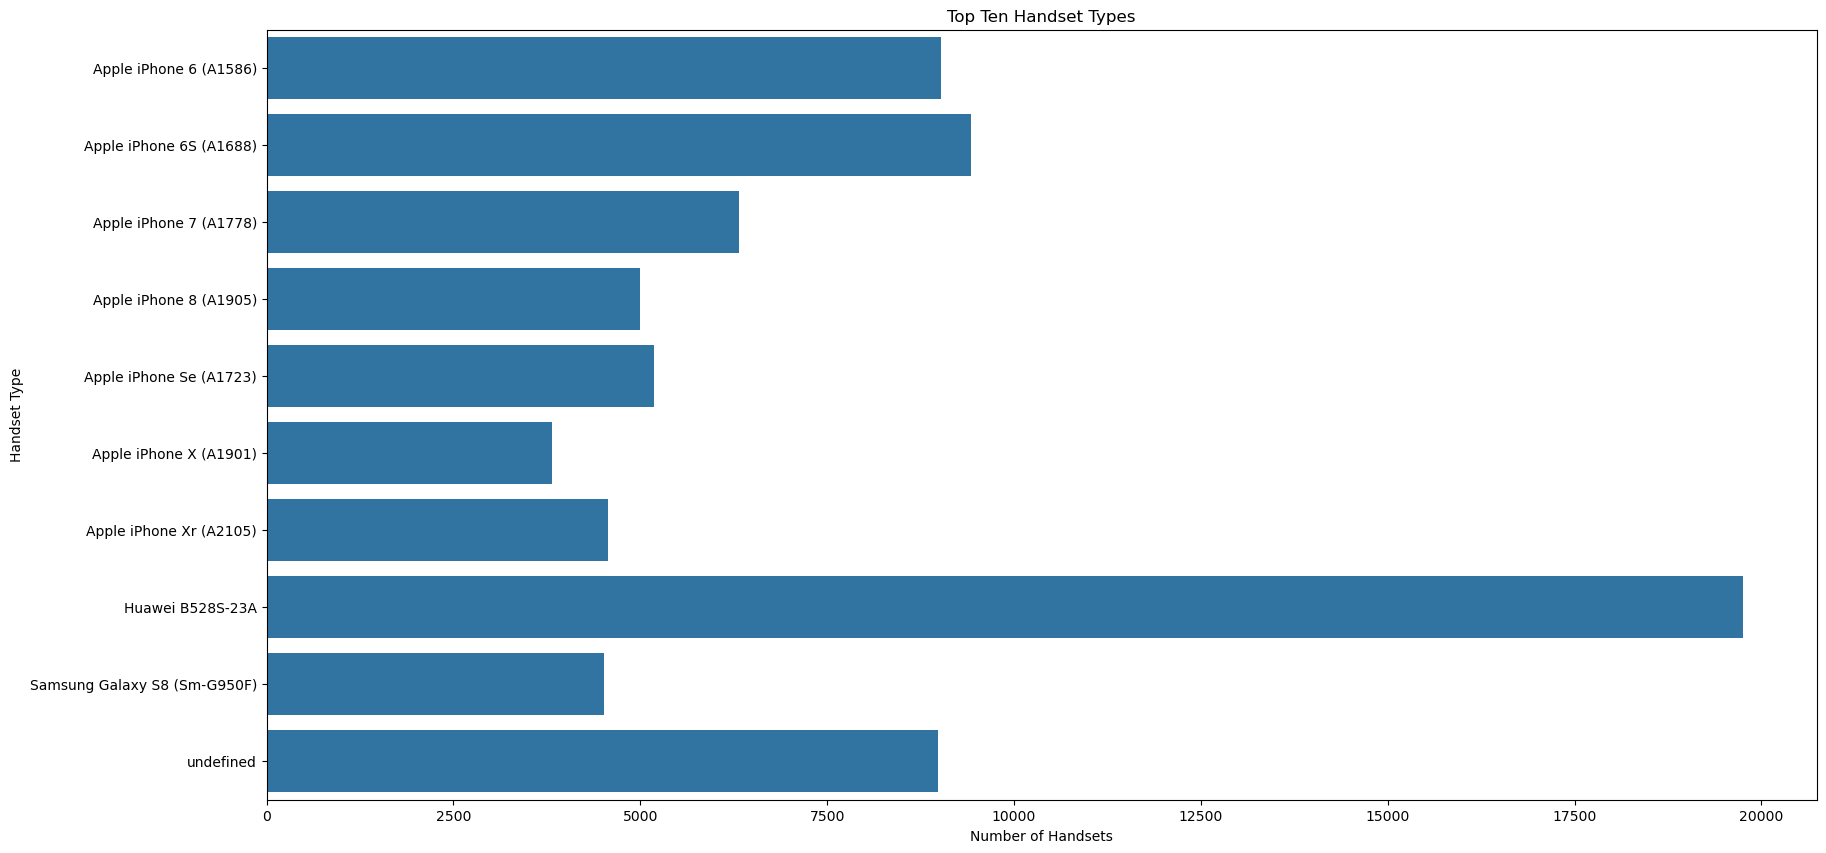

In [29]:
# Assuming 'original_df' is your original DataFrame with 'Handset Type' column

# 1. Group by 'Handset Type' and get the counts
top_10_sets = data.groupby('Handset Type')['Handset Type'].count().reset_index(name='count')

# 2. Sort by count and get the top 10
top_10_sets = top_10_sets.sort_values(by=['count'], ascending=False).head(10)

# 3. Create the bar plot
plt.figure(figsize=(20, 10))
top_10_sets['Handset Type'] = pd.Categorical(top_10_sets['Handset Type']) # Convert to categorical
sns.barplot(y=top_10_sets['Handset Type'], x=top_10_sets['count'])  
plt.xlabel('Number of Handsets')
plt.ylabel('Handset Type')
plt.title('Top Ten Handset Types')
plt.show()

# Bottom 10 handsets

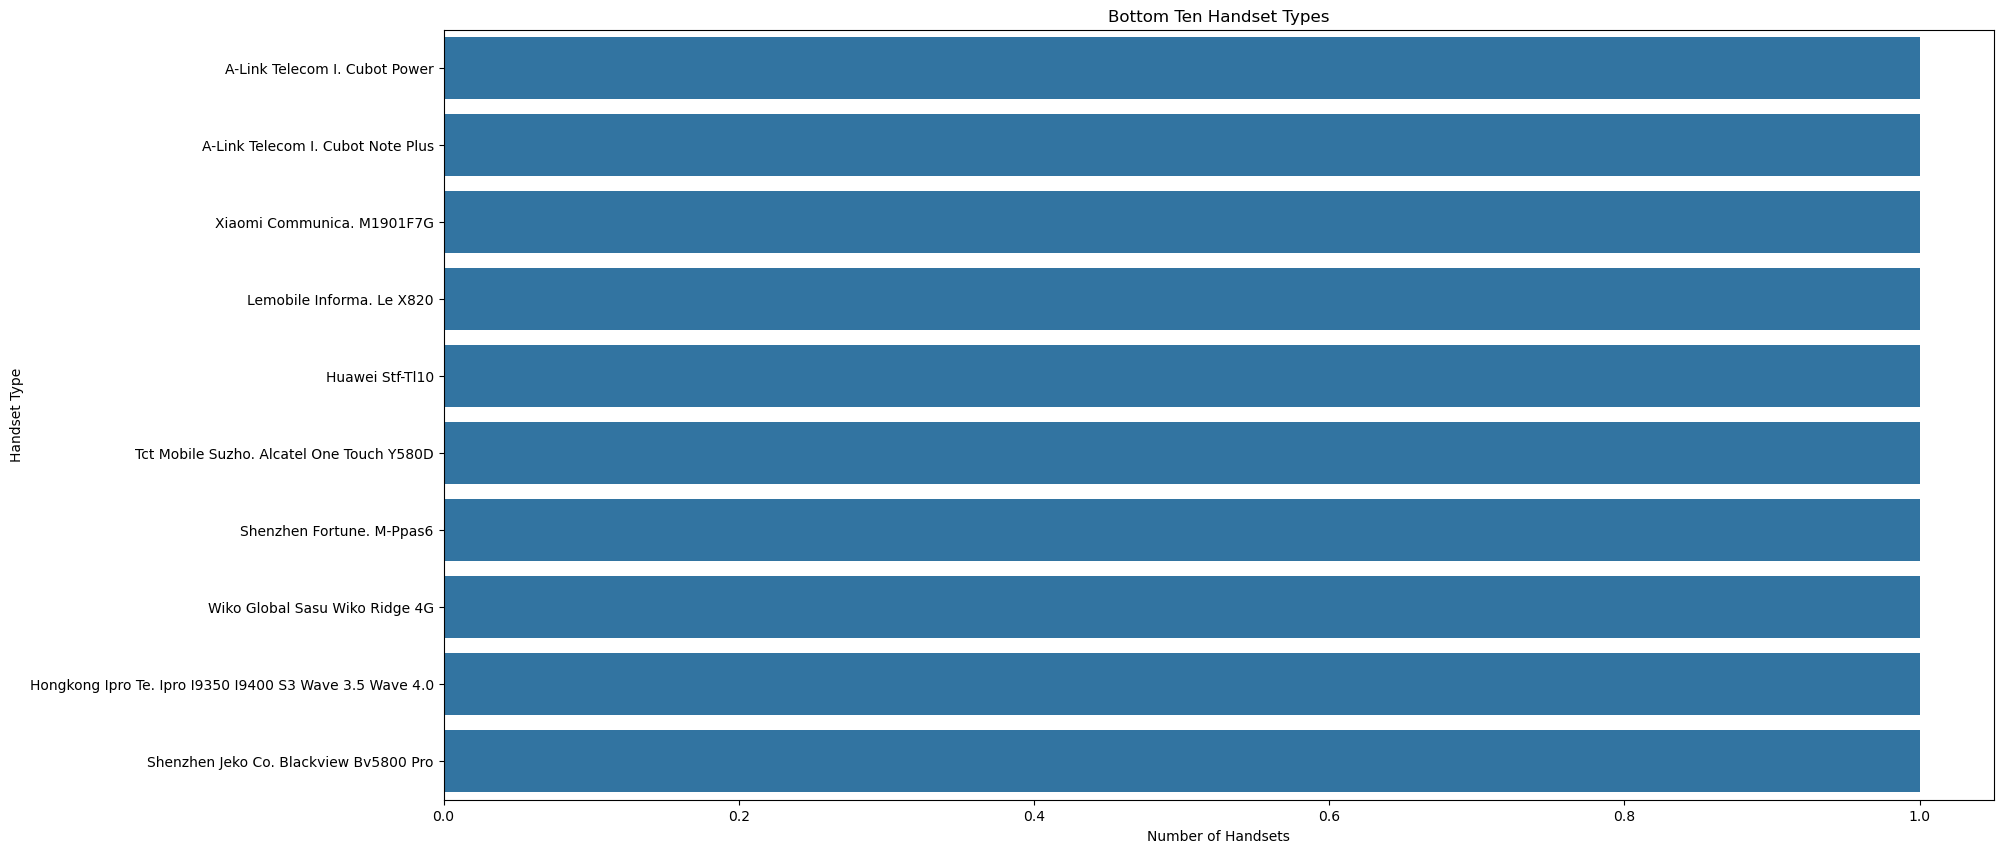

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with 'Handset Type' column

# Get the bottom 10 handset types and their counts
b_10 = data['Handset Type'].value_counts(ascending=False).tail(10)
b_10 = pd.DataFrame(b_10)
b_10 = b_10.rename(columns={'Handset Type': 'count'})  # Rename the column to 'count'

# Create the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(y=b_10.index, x=b_10['count'])  # Use 'count' for x-axis
plt.xlabel('Number of Handsets')
plt.ylabel('Handset Type')
plt.title('Bottom Ten Handset Types')
plt.show()

# top 3 handset manufacturers

In [31]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts(ascending = False).head(3)
top_3_manufacturers = pd.DataFrame(top_3_manufacturers)
top_3_manufacturers


count
Handset Manufacturer       
Apple                 59565
Samsung               40839
Huawei                34423

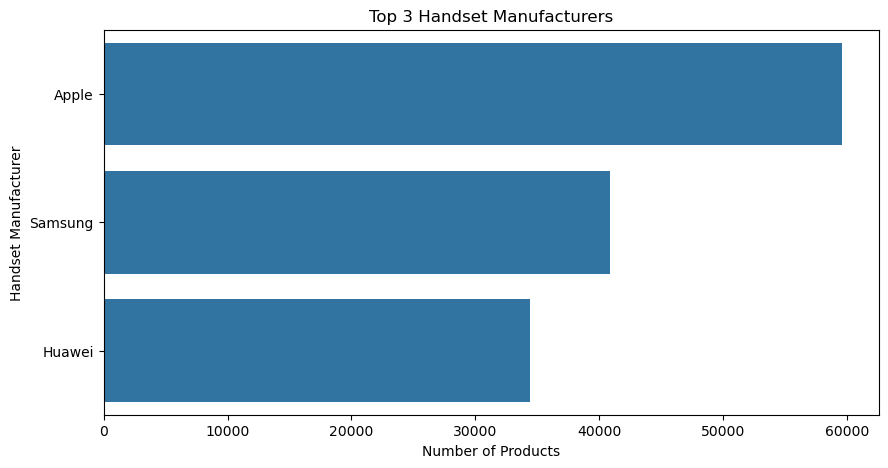

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'top_3_manufacturers' is your DataFrame

# Rename the 'Handset Manufacturer' column to 'count'
top_3_manufacturers = top_3_manufacturers.rename(columns={'Handset Manufacturer': 'count'}) 

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(y=top_3_manufacturers.index, x=top_3_manufacturers['count']) 
plt.xlabel('Number of Products')
plt.ylabel('Handset Manufacturer')  # Added a ylabel for clarity
plt.title('Top 3 Handset Manufacturers')
plt.show()

# Bottom 3 manufacturers

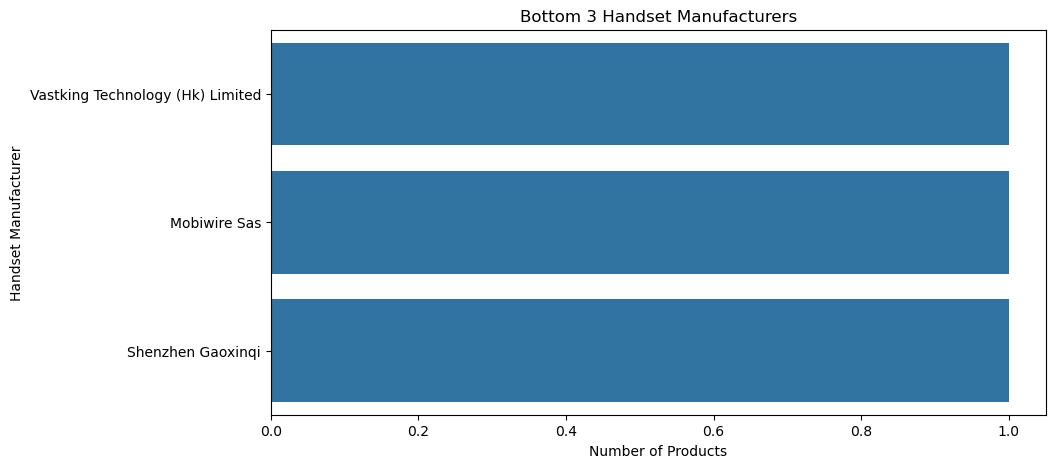

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with 'Handset Manufacturer' column

# Get the bottom 3 handset manufacturers and their counts
b3 = data['Handset Manufacturer'].value_counts(ascending=False).tail(3)
b3 = pd.DataFrame(b3)
b3 = b3.rename(columns={'Handset Manufacturer': 'count'})  # Rename the column to 'count'

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(y=b3.index, x=b3['count'])  # Use 'count' for the x-axis
plt.xlabel('Number of Products')
plt.ylabel('Handset Manufacturer')  # Added ylabel for clarity
plt.title('Bottom 3 Handset Manufacturers')
plt.show()

# top 5 handsets per handset manufacturer

In [34]:
a = data.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name = 'count').sort_values(['Handset Manufacturer', 'count'], ascending = False).groupby('Handset Manufacturer').head(5)
a.tail(20)

Handset Manufacturer  \
66                                    Apple   
80                                    Apple   
73                                    Apple   
24                      Alif Communications   
23                                     Adar   
20                                     Acer   
19                                     Acer   
14                                     Acer   
15                                     Acer   
16                                     Acer   
7                                   ASUSTeK   
12                                  ASUSTeK   
13                                  ASUSTeK   
9                                   ASUSTeK   
10                                  ASUSTeK   
6   A-Link Telecom International Co Limited   
0   A-Link Telecom International Co Limited   
1   A-Link Telecom International Co Limited   
2   A-Link Telecom International Co Limited   
3   A-Link Telecom International Co Limited   

                            Handset Type  count  
66                Apple iPhone 7 (A1778)   6326  
80               Apple iPhone Se (A1723)   5187  
73                Apple iPhone 8 (A1905)   4993  
24         Alif Communicati. Pulian Cm84      1  
23              Adar Stanley Mobile S231      1  
20                             Acer M310      5  
19                 Acer Liquid Zest Plus      2  
14                      Acer Liquid M220      1  
15                      Acer Liquid Z220      1  
16                      Acer Liquid Z530      1  
7        Asustek Asus Zb552Kl Zenfone Go      7  
12   Asustek Asus Zenfone2 Laser Ze600Kl      5  
13   Asustek Asus Zenfone2 Laser Ze601Kl      4  
9   Asustek Asus Zenfone 2 Laser Ze500Kl      3  
10   Asustek Asus Zenfone Selfie Zd551Kl      2  
6       A-Link Telecom I. Cubot X18 Plus      2  
0             A-Link Telecom I. Cubot A5      1  
1      A-Link Telecom I. Cubot Note Plus      1  
2         A-Link Telecom I. Cubot Note S      1  
3           A-Link Telecom I. Cubot Nova      1

In [35]:
# data.groupby(["Handset Manufacturer", 'Handset Type'])['Handset Type'].count().reset_index(name='Count')
# b = pd.DataFrame(data.groupby(['Handset Manufacturer', 'Handset Type']).size()).groupby('Handset Manufacturer')
# b = b.apply(lambda _df: _df.sort_values(by=['Handset Manufacturer'], ascending = False))
# b.head(20)
# data[data['Handset Type'] == 'Apple iPhone 7 (A1778)'].shape

In [36]:
# data.groupby('Handset Manufacturer')['Handset Type'].value_counts().unstack(0).plot.barh()

# Make a short interpretation and recommendation to marketing teams
Apple, Huawei and Samsung are the leading manufacturers. The top 10 handsets also are manufactured by these companies. Some of the bottom 10 handsets also belong to these manufacturers. 
Thus the volume of the most common handsets should be increased to replace the least common sets.
Products from the bottom 3 manufacturers should no longer be stocked. Their extremely small volume matches small profit percentage in comparison to other manufacturers.

# Aggregate per user the following information in the column

In [37]:
xdr_sess = data[['Bearer Id', 'MSISDN/Number']]
a = xdr_sess.groupby('MSISDN/Number').count()
a.columns = ['xdr sessions']
a.head()

xdr sessions
MSISDN/Number              
3.360100e+10              1
3.360100e+10              1
3.360100e+10              1
3.360101e+10              1
3.360101e+10              2

# number of xDR sessions

Text(0.5, 1.0, 'users with highest session numbers')

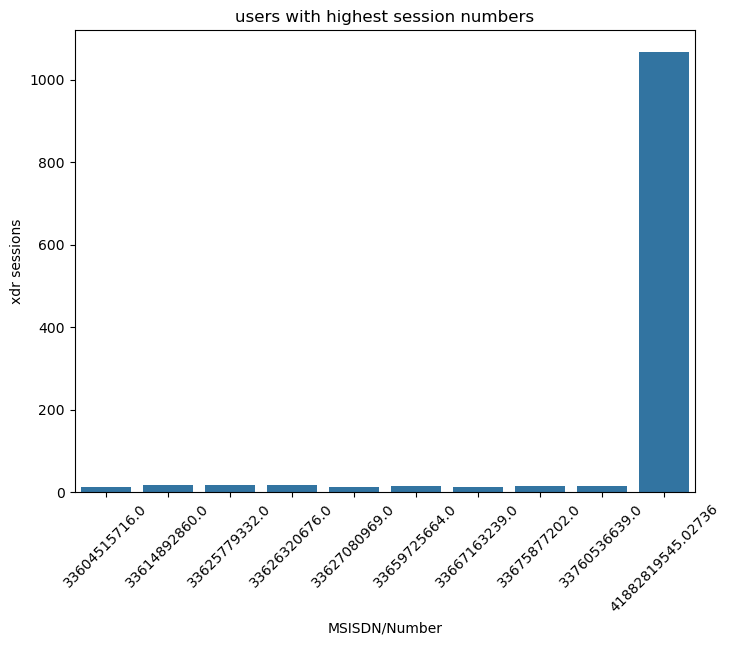

In [38]:
t = a.sort_values(by = 'xdr sessions', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['xdr sessions'])
plt.xticks(rotation = 45)
plt.title('users with highest session numbers')

# Session duration

In [39]:
duration = data[['Dur. (ms)', 'MSISDN/Number']]
b = duration.groupby('MSISDN/Number').sum()
b.columns = ['sess_duration (ms)']
b.head()

sess_duration (ms)
MSISDN/Number                    
3.360100e+10             116720.0
3.360100e+10             181230.0
3.360100e+10             134969.0
3.360101e+10              49878.0
3.360101e+10              37104.0

Text(0.5, 1.0, 'users with longest session duration')

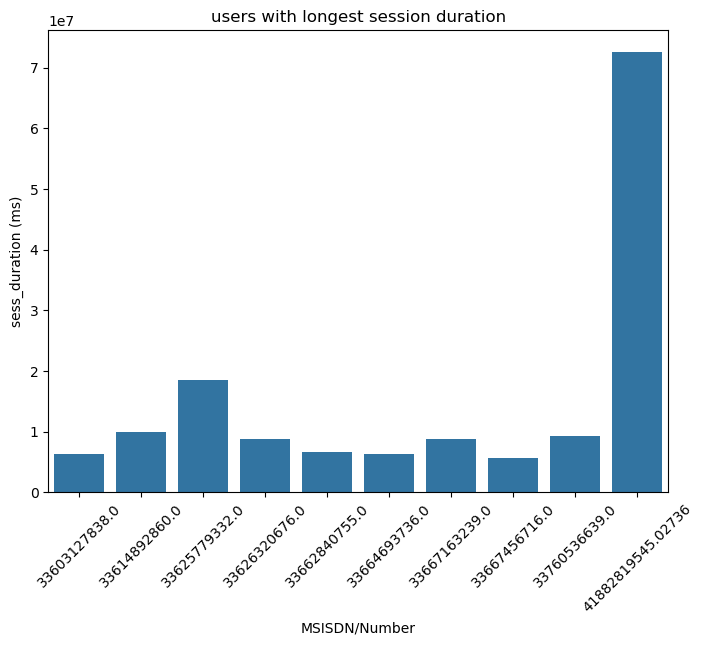

In [40]:
t = b.sort_values(by = 'sess_duration (ms)', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['sess_duration (ms)'])
plt.xticks(rotation = 45)
plt.title('users with longest session duration')

# The total download (DL) and upload (UL) data

In [41]:
byte = data[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

Total UL (Bytes)  Total DL (Bytes)   total_bytes
MSISDN/Number                                                  
3.360100e+10         36053108.0      8.426375e+08  8.786906e+08
3.360100e+10         36104459.0      1.207552e+08  1.568596e+08
3.360100e+10         39306820.0      5.566597e+08  5.959665e+08
3.360101e+10         20327526.0      4.019932e+08  4.223207e+08
3.360101e+10         94280527.0      1.363130e+09  1.457411e+09

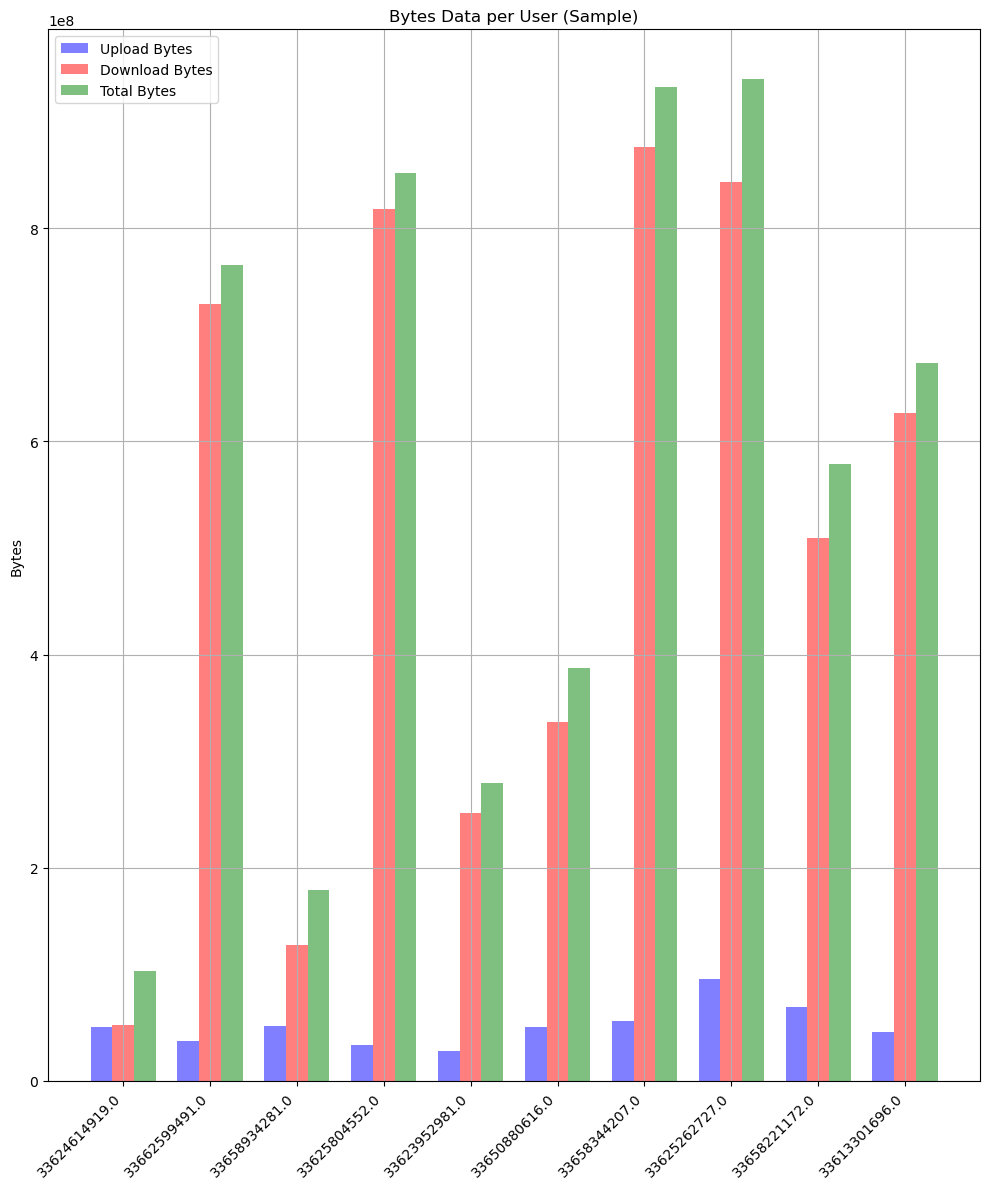

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'c' is your DataFrame

# Get a sample of 10 users
t = c.sample(10)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 12))
width = 0.25
x = np.arange(len(t.index))  # Use numpy array for x-axis

# Create the bars
ax.bar(x - width, t['Total UL (Bytes)'], width, label='Upload Bytes', color='b', alpha=0.5)
ax.bar(x, t['Total DL (Bytes)'], width, label='Download Bytes', color='r', alpha=0.5)
ax.bar(x + width, t['total_bytes'], width, label='Total Bytes', color='g', alpha=0.5)

# Customize the plot
ax.set_ylabel('Bytes')
ax.set_title('Bytes Data per User (Sample)')
ax.set_xticks(x)
ax.set_xticklabels(t.index, rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.legend(loc='upper left')
ax.grid(True)

# Adjust plot limits for better visualization
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

# Upload bytes are less than download bytes throughout.

# The total data volume (in Bytes) during this session for each application

In [43]:
# I had already created total bytes columns for all the applications.
apps = data[['MSISDN/Number','social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]
d = apps.groupby('MSISDN/Number').sum()
d.head()

social_media      google      email     youtube     netflix  \
MSISDN/Number                                                                
3.360100e+10      2232135.0   4389005.0  1331362.0  21624548.0  27180981.0   
3.360100e+10      2660565.0   5334863.0  3307781.0  12432223.0  11221763.0   
3.360100e+10      3195623.0   3443126.0  3205380.0  21333570.0  19353900.0   
3.360101e+10       280294.0   9678493.0  2284670.0   6977321.0   1942092.0   
3.360101e+10      2912542.0  18499616.0  3305469.0  41533002.0  49201724.0   

                     gaming        other  
MSISDN/Number                             
3.360100e+10   8.124587e+08  386570872.0  
3.360100e+10   1.197501e+08  281710071.0  
3.360100e+10   5.388277e+08  501693672.0  
3.360101e+10   3.911261e+08   35279702.0  
3.360101e+10   1.314798e+09  804804484.0

In [44]:
# sns.barplot(x=d.index.head(), y=, hue='variable', data=df1)
# plt.xticks(rotation=90)
# plt.ylabel('Returns')
# plt.title('Portfolio vs Benchmark Returns');

# Non-Graphical Univariate Analysis

# Dispersion and Central Tendency

In [45]:
# data.describe()

In [46]:
# variables = data[['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)', 'social_media', 'netflix', 'gaming', 'youtube', 'google', 'email', 'other']]
# variables.describe()

In [47]:
variables = data[['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)', 'social_media', 'netflix',
                  'gaming', 'youtube', 'google', 'email', 'other', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]
variables.describe().transpose()

count          mean           std  \
Bearer Id                    150001.0  1.013887e+19  2.883597e+18   
Dur. (ms).1                  150001.0  1.046091e+08  8.103734e+07   
Total UL (Bytes)             150001.0  4.112121e+07  1.127635e+07   
Total DL (Bytes)             150001.0  4.546434e+08  2.441421e+08   
social_media                 150001.0  1.828250e+06  1.035646e+06   
netflix                      150001.0  2.262861e+07  9.260820e+06   
gaming                       150001.0  4.303331e+08  2.440199e+08   
youtube                      150001.0  2.264348e+07  9.246800e+06   
google                       150001.0  7.807295e+06  3.516420e+06   
email                        150001.0  2.259102e+06  1.071109e+06   
other                        150001.0  4.293653e+08  2.432681e+08   
Avg RTT DL (ms)              150001.0  1.097957e+02  5.593426e+02   
Avg RTT UL (ms)              150001.0  1.766288e+01  7.652993e+01   
Avg Bearer TP DL (kbps)      150001.0  1.330005e+04  2.397180e+04   
Avg Bearer TP UL (kbps)      150001.0  1.770429e+03  4.625340e+03   
TCP DL Retrans. Vol (Bytes)  150001.0  2.080991e+07  1.172356e+08   
TCP UL Retrans. Vol (Bytes)  150001.0  7.596587e+05  1.577616e+07   

                                      min           25%           50%  \
Bearer Id                    6.917540e+18  7.349880e+18  7.349880e+18   
Dur. (ms).1                  7.142988e+06  5.744206e+07  8.639998e+07   
Total UL (Bytes)             2.866892e+06  3.322203e+07  4.114324e+07   
Total DL (Bytes)             7.114041e+06  2.431072e+08  4.558409e+08   
social_media                 1.563000e+03  9.322180e+05  1.826471e+06   
netflix                      9.843200e+04  1.597946e+07  2.263554e+07   
gaming                       3.063580e+05  2.187279e+08  4.316150e+08   
youtube                      7.890300e+04  1.599846e+07  2.266177e+07   
google                       4.033000e+04  4.943599e+06  7.812835e+06   
email                        8.359000e+03  1.359344e+06  2.263567e+06   
other                        1.490450e+05  2.185534e+08  4.299865e+08   
Avg RTT DL (ms)              0.000000e+00  3.500000e+01  5.400000e+01   
Avg RTT UL (ms)              0.000000e+00  3.000000e+00  7.000000e+00   
Avg Bearer TP DL (kbps)      0.000000e+00  4.300000e+01  6.300000e+01   
Avg Bearer TP UL (kbps)      0.000000e+00  4.700000e+01  6.300000e+01   
TCP DL Retrans. Vol (Bytes)  2.000000e+00  1.332932e+06  2.080991e+07   
TCP UL Retrans. Vol (Bytes)  1.000000e+00  6.300900e+04  7.596587e+05   

                                      75%           max  
Bearer Id                    1.304240e+19  1.318650e+19  
Dur. (ms).1                  1.324307e+08  1.859336e+09  
Total UL (Bytes)             4.903424e+07  7.833131e+07  
Total DL (Bytes)             6.657051e+08  9.029696e+08  
social_media                 2.727487e+06  3.650861e+06  
netflix                      2.929044e+07  4.519815e+07  
gaming                       6.414159e+08  8.592028e+08  
youtube                      2.929260e+07  4.519008e+07  
google                       1.068280e+07  1.552878e+07  
email                        3.159818e+06  4.518036e+06  
other                        6.399275e+08  8.595209e+08  
Avg RTT DL (ms)              1.097957e+02  9.692300e+04  
Avg RTT UL (ms)              1.766288e+01  7.120000e+03  
Avg Bearer TP DL (kbps)      1.971000e+04  3.781600e+05  
Avg Bearer TP UL (kbps)      1.120000e+03  5.861300e+04  
TCP DL Retrans. Vol (Bytes)  2.080991e+07  4.294426e+09  
TCP UL Retrans. Vol (Bytes)  7.596587e+05  2.908226e+09

In [48]:
data['Bearer Id'].nunique()

10

In [49]:
# skewness and kurtosis
s = variables.skew(axis = 0, skipna = True) 
k = variables.kurt(axis = 0, skipna = True) 
pd.DataFrame([s, k], index = ['skewness', 'kurtosis'])

Bearer Id  Dur. (ms).1  Total UL (Bytes)  Total DL (Bytes)  \
skewness   0.026755     3.952622         -0.002456         -0.003153   
kurtosis  -1.988473    37.022470         -0.327436         -1.198363   

          social_media   netflix    gaming   youtube    google     email  \
skewness     -0.002121 -0.000409 -0.003225 -0.005465 -0.010602 -0.006033   
kurtosis     -1.202178 -0.608472 -1.202256 -0.604624 -0.963035 -1.061696   

             other  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
skewness  0.001256        69.705161        31.530109                 2.589445   
kurtosis -1.196015      8805.687875      1632.646032                 9.573691   

          Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
skewness                 4.503428                    24.840677   
kurtosis                25.086860                   697.574773   

          TCP UL Retrans. Vol (Bytes)  
skewness                   141.035684  
kurtosis                 21913.803296

# Outlier Detection

In [50]:
# Outlier detection

# chauvenets creterion (assumes normally distributed data)

# def chauvenet(array):
#     mean = array.mean()           # Mean of incoming array
#     stdv = array.std()            # Standard deviation
#     N = len(array)                # Lenght of incoming array
#     criterion = 1.0/(2*N)         # Chauvenet's criterion
#     d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
#     prob = erfc(d)                # Area normal dist.    
#     return prob < criterion       # Use boolean array outside this function#

#zscore (assumes normal distribution too. not good)

In [51]:
#IQR

#google
Q1 = np.percentile(data.google, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.google, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.google, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.google, interpolation = 'midpoint') 
o = (data.google < (Q1 - 1.5 * IQR)) |(data.google > (Q3 + 1.5 * IQR))
i = o.unique()

#youtube
Q1 = np.percentile(data.youtube, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.youtube, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.youtube, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.youtube, interpolation = 'midpoint') 
o = (data.youtube < (Q1 - 1.5 * IQR)) |(data.youtube > (Q3 + 1.5 * IQR))
j = o.unique()

#gaming
Q1 = np.percentile(data.gaming, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.gaming, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.gaming, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.gaming, interpolation = 'midpoint') 
o = (data.gaming < (Q1 - 1.5 * IQR)) |(data.gaming > (Q3 + 1.5 * IQR))
k = o.unique()


#netflix
Q1 = np.percentile(data.netflix, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.netflix, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.netflix, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.netflix, interpolation = 'midpoint') 
o = (data.netflix < (Q1 - 1.5 * IQR)) |(data.netflix > (Q3 + 1.5 * IQR))
l = o.unique()


#email
Q1 = np.percentile(data.email, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.email, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.email, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.email, interpolation = 'midpoint') 
o = (data.email < (Q1 - 1.5 * IQR)) |(data.email > (Q3 + 1.5 * IQR))
m = np.unique(o)


#social_media
Q1 = np.percentile(data.social_media, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.social_media, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.social_media, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.social_media, interpolation = 'midpoint') 
o = (data.social_media < (Q1 - 1.5 * IQR)) |(data.social_media > (Q3 + 1.5 * IQR))
n = o.unique()

#others
Q1 = np.percentile(data.other, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.other, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.other, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.other, interpolation = 'midpoint') 
o = (data.other < (Q1 - 1.5 * IQR)) |(data.other > (Q3 + 1.5 * IQR))
p = o.unique()




['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
#Dur. (ms).1
Q1 = np.percentile(data['Dur. (ms).1'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Dur. (ms).1'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Dur. (ms).1'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(data['Dur. (ms).1'], interpolation = 'midpoint') 
o = (data['Dur. (ms).1'] < (Q1 - 1.5 * IQR)) |(data['Dur. (ms).1'] > (Q3 + 1.5 * IQR))
q = o.unique()

#total_bytes
Q1 = np.percentile(data.total_bytes, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.total_bytes, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.total_bytes, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.total_bytes, interpolation = 'midpoint') 
o = (data.total_bytes < (Q1 - 1.5 * IQR)) |(data.total_bytes > (Q3 + 1.5 * IQR))
r = o.unique()

#total_tp
Q1 = np.percentile(data.total_tp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.total_tp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.total_tp, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.total_tp, interpolation = 'midpoint') 
o = (data.total_tp < (Q1 - 1.5 * IQR)) |(data.total_tp > (Q3 + 1.5 * IQR))
s = o.unique()

#total_rtt
Q1 = np.percentile(data.total_rtt, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.total_rtt, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.total_rtt, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.total_rtt, interpolation = 'midpoint') 
o = (data.total_rtt < (Q1 - 1.5 * IQR)) |(data.total_rtt > (Q3 + 1.5 * IQR))
t = o.unique()

#total_tcp
Q1 = np.percentile(data.total_tcp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data.total_tcp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data.total_tcp, 75, interpolation = 'midpoint')  
IQR = stats.iqr(data.total_tcp, interpolation = 'midpoint') 
o = (data.total_tcp < (Q1 - 1.5 * IQR)) |(data.total_tcp > (Q3 + 1.5 * IQR))
u = o.unique()


print('google', i)
print('youtube', j)
print('gaming', k)
print('netflix', l)
print('email', m)
print('social media', n)
print('other', p)
print('Duration', q)
print('total bytes', r)
print('total_tp', s)
print('total_rtt', t)
print('total_tcp', u)

google [False]
youtube [False]
gaming [False]
netflix [False]
email [False]
social media [False]
other [False]
Duration [ True False]
total bytes [False]
total_tp [False  True]
total_rtt [False  True]
total_tcp [False  True]


# Graphical Univariate Analysis.


 mu = 430333100.71 and sigma = 244019110.62



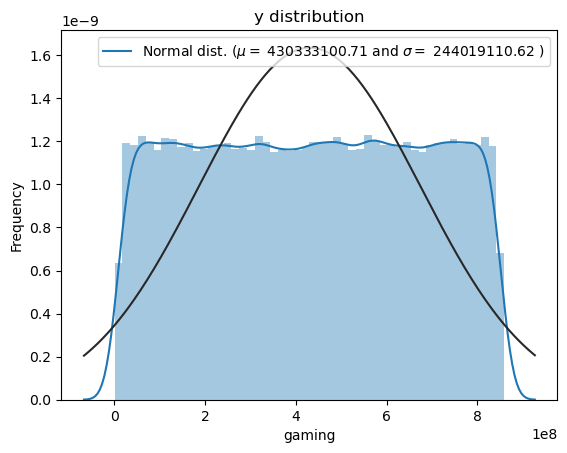

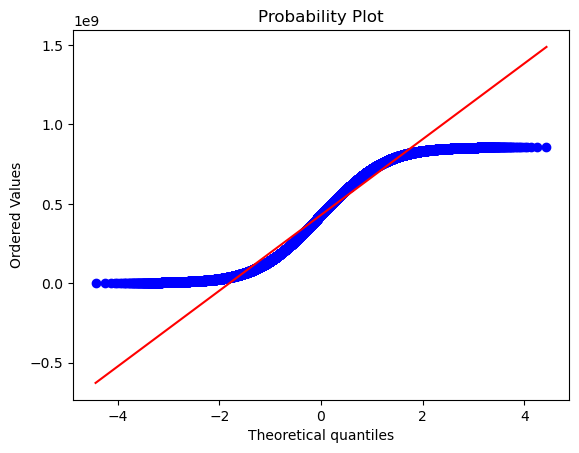

In [52]:
sns.distplot(data['gaming'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['gaming'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['gaming'], plot=plt)
plt.show()


 mu = 22628606.54 and sigma = 9260789.22



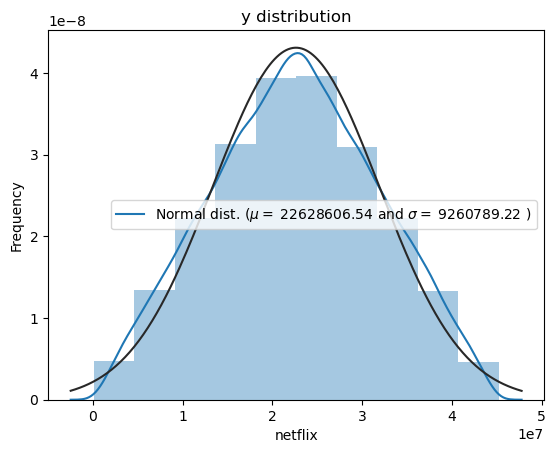

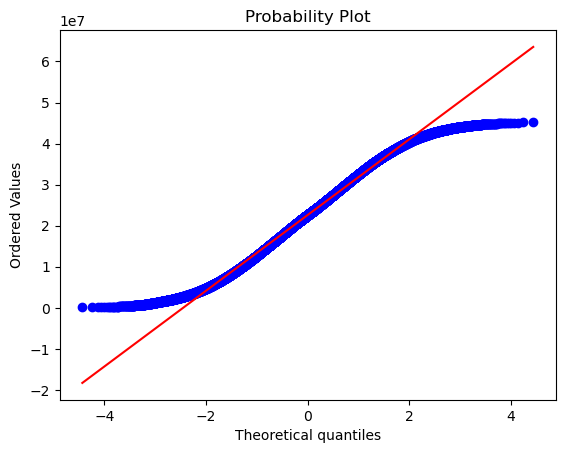

In [53]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(data['netflix'] , bins = 10, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['netflix'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['netflix'], plot=plt)
plt.show()


 mu = 22643482.64 and sigma = 9246769.48



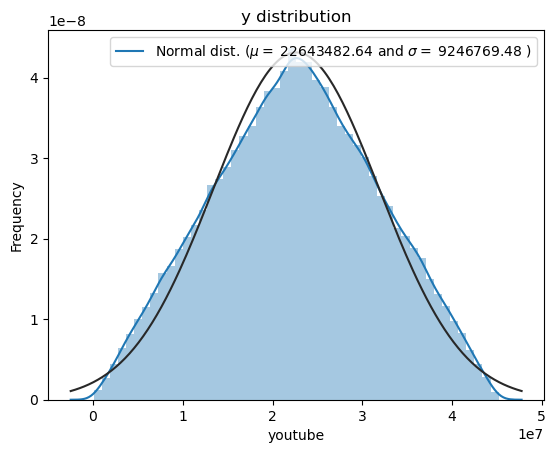

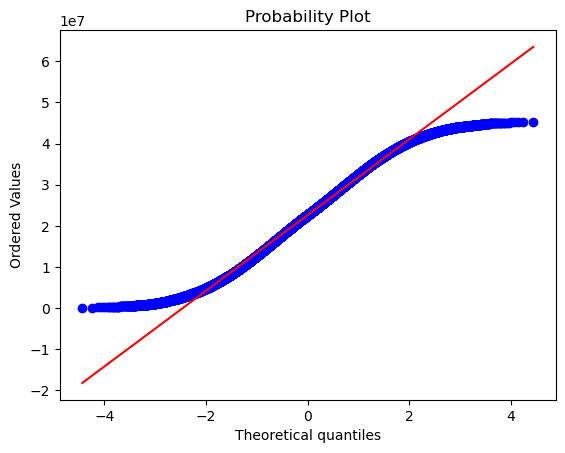

In [54]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(data['youtube'] , fit=norm);
# sns.violinplot(data['youtube'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['youtube'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['youtube'], plot=plt)
plt.show()


 mu = 2259102.31 and sigma = 1071105.49



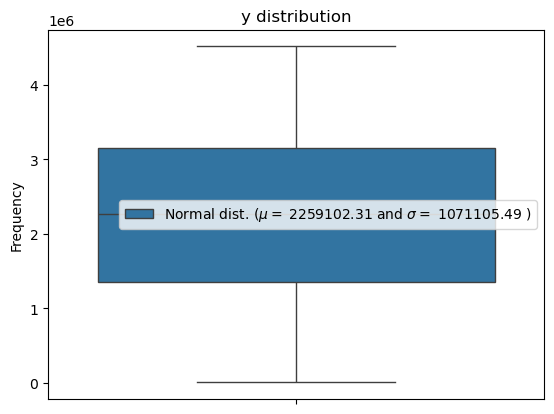

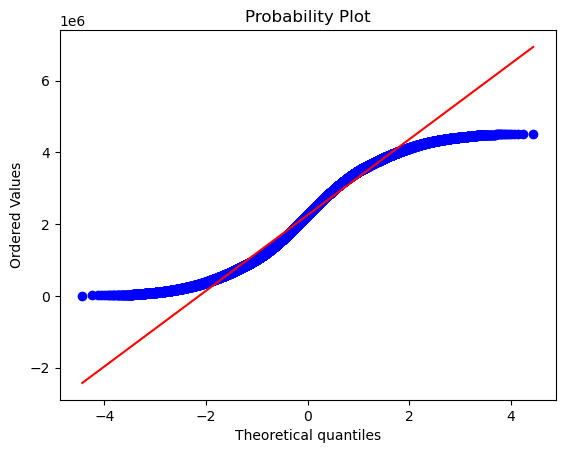

In [55]:
# sns.distplot(data['email'], fit = norm) # numeric
sns.boxplot(data['email'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['email'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['email'], plot=plt)
plt.show()


 mu = 7807294.55 and sigma = 3516408.52



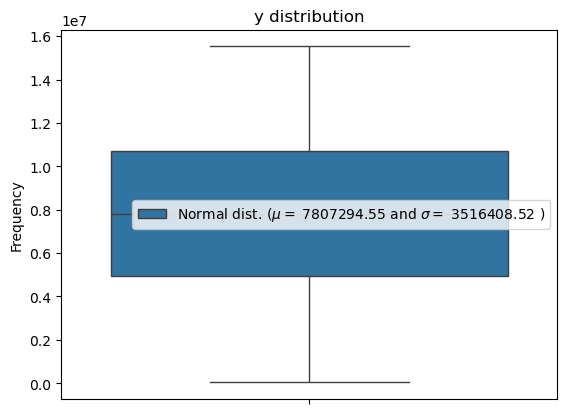

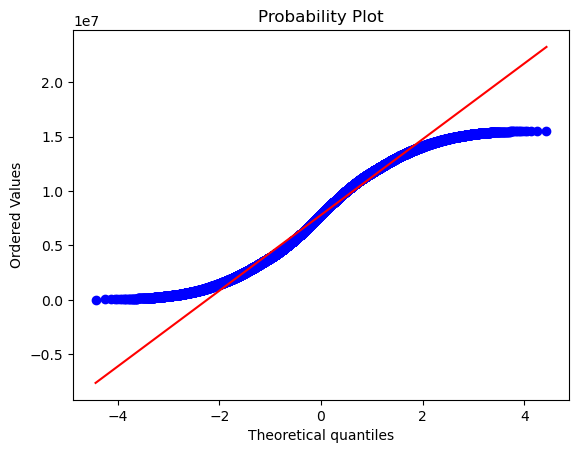

In [56]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
# sns.distplot(data['google'] , fit=norm);
sns.boxplot(data['google'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['google'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['google'], plot=plt)
plt.show()


 mu = 1828250.21 and sigma = 1035642.69



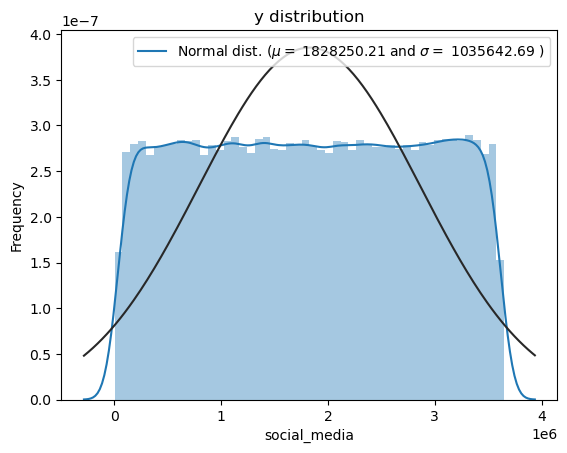

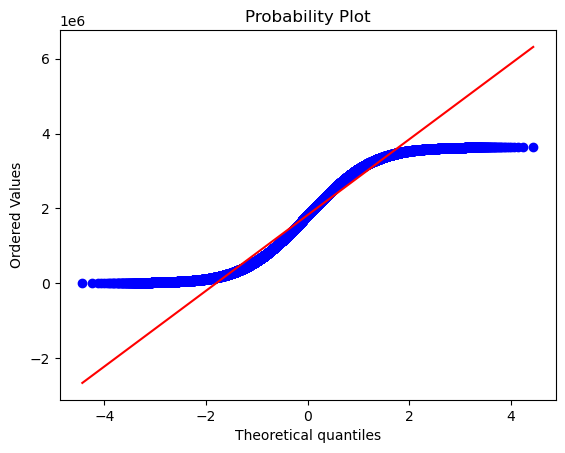

In [57]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(data['social_media'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['social_media'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['social_media'], plot=plt)
plt.show()


 mu = 495764636.37 and sigma = 244380172.44



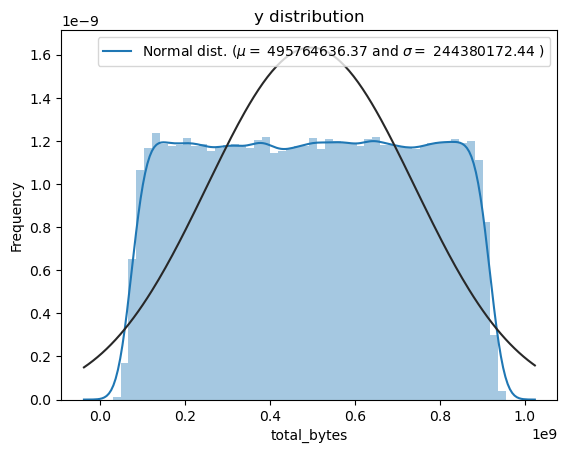

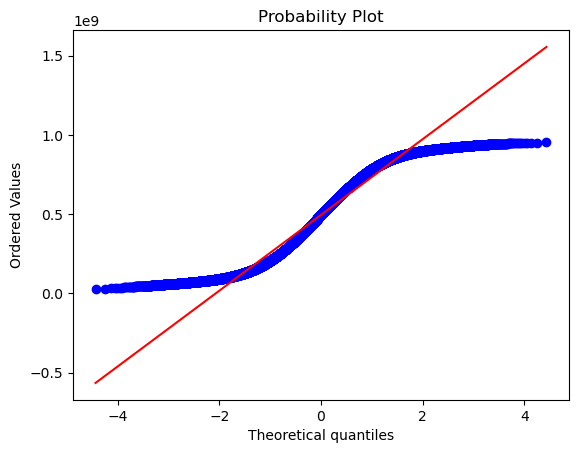

In [58]:
# total upload and download bytes
sns.distplot(data['total_bytes'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_bytes'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_bytes'], plot=plt)
plt.show()


 mu = 104609105.55 and sigma = 81037071.33



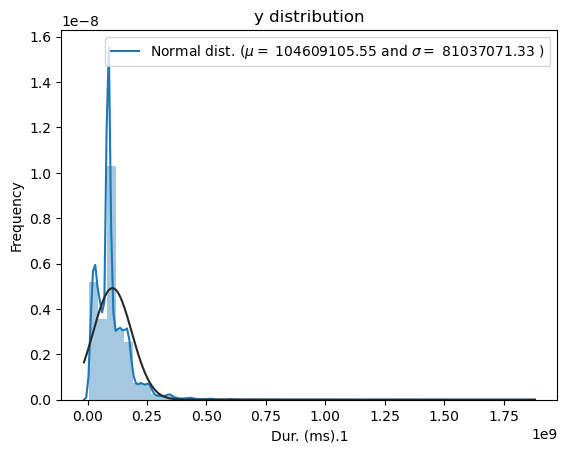

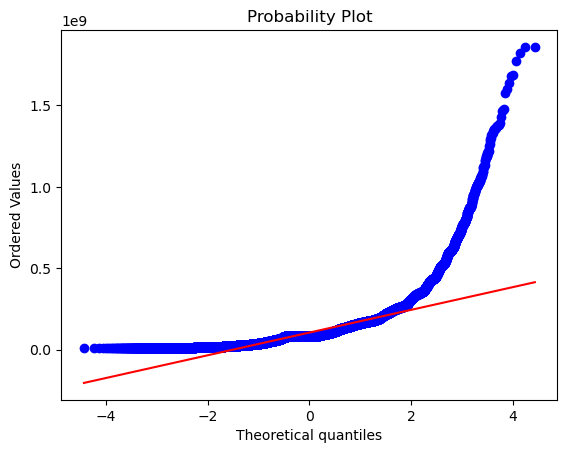

In [59]:
# xdr ms
sns.distplot(data['Dur. (ms).1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Dur. (ms).1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Dur. (ms).1'], plot=plt)
plt.show()


 mu = 15070.47 and sigma = 26825.67



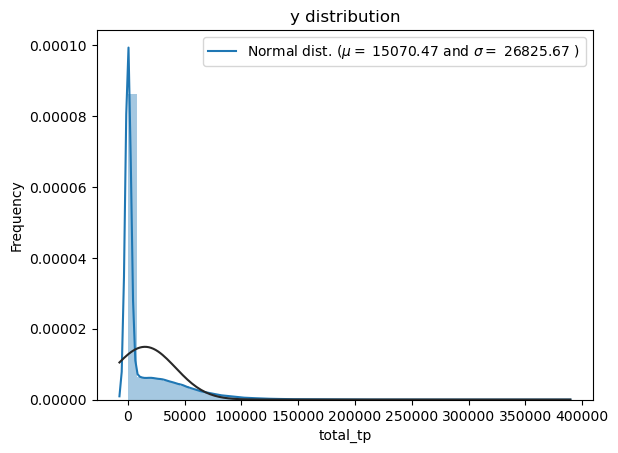

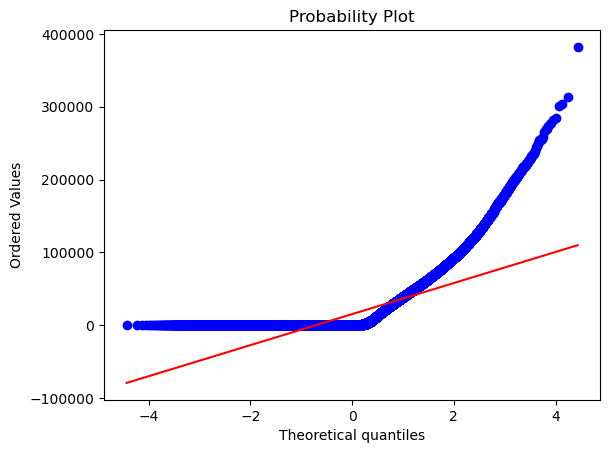

In [60]:
# total_tp
sns.distplot(data['total_tp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_tp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_tp'], plot=plt)
plt.show()


 mu = 127.46 and sigma = 565.14



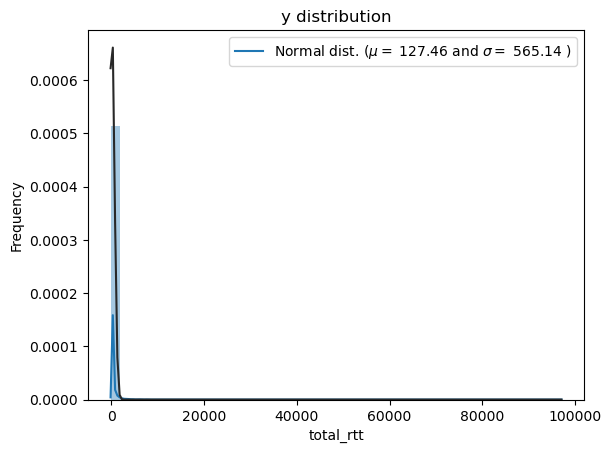

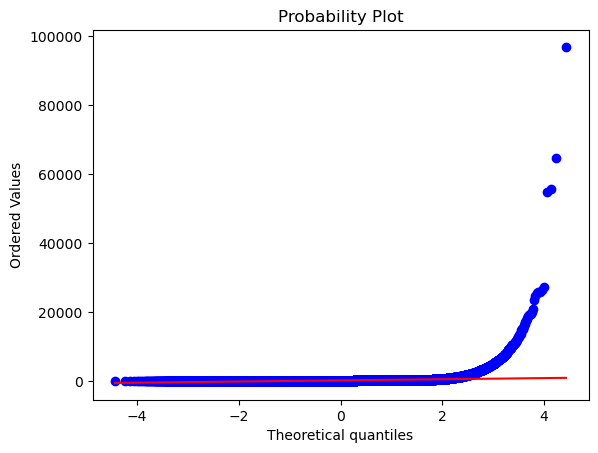

In [61]:
# total_rtt
sns.distplot(data['total_rtt'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_rtt'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_rtt'], plot=plt)
plt.show()


 mu = 21569572.94 and sigma = 118438811.90



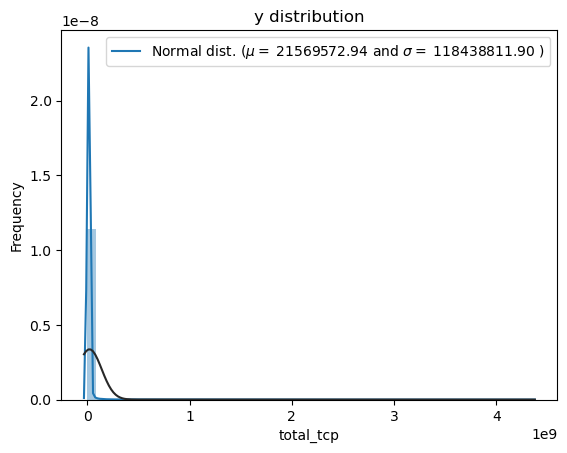

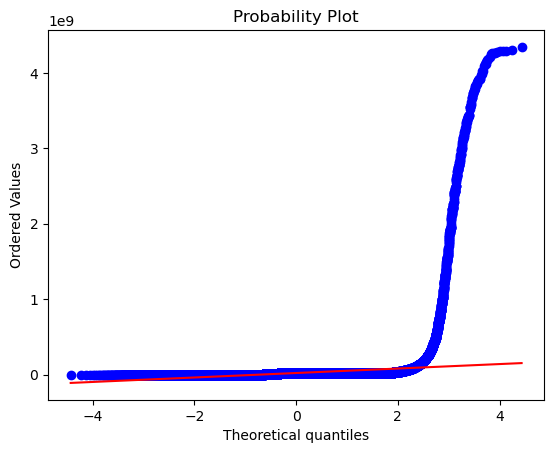

In [62]:
# total_tcp
sns.distplot(data['total_tcp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_tcp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_tcp'], plot=plt)
plt.show()

# Bivariate Analysis

In [63]:
# data['total'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
# sns.barplot(x = data['social_media'], y = data['total'])

biv_data = data[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'total_bytes', 'other']]
# adding a summation row in all columns
biv_data.loc['totals'] = biv_data.sum()
biv_data.tail()

social_media        google         email       youtube       netflix  \
149997  2.352181e+06  4.415361e+06  2.121718e+06  2.216552e+07  4.064329e+07   
149998  1.260239e+06  6.585469e+06  2.058277e+06  2.451641e+07  1.502970e+07   
149999  8.231090e+05  7.757267e+06  2.850914e+06  1.712251e+07  1.649484e+07   
150000  1.828250e+06  7.807295e+06  2.259102e+06  2.264348e+07  2.262861e+07   
totals  2.742394e+11  1.171102e+12  3.388676e+11  3.396545e+12  3.394314e+12   

              gaming   total_bytes         other  
149997  6.316281e+08  7.057839e+08  7.146381e+08  
149998  5.669338e+08  6.276986e+08  1.324156e+08  
149999  3.550664e+08  4.015220e+08  8.161200e+08  
150000  4.303331e+08  4.957646e+08  4.293653e+08  
totals  6.455040e+13  7.436519e+13  6.440523e+13

# Applications total bytes

Text(0.5, 0, 'application')

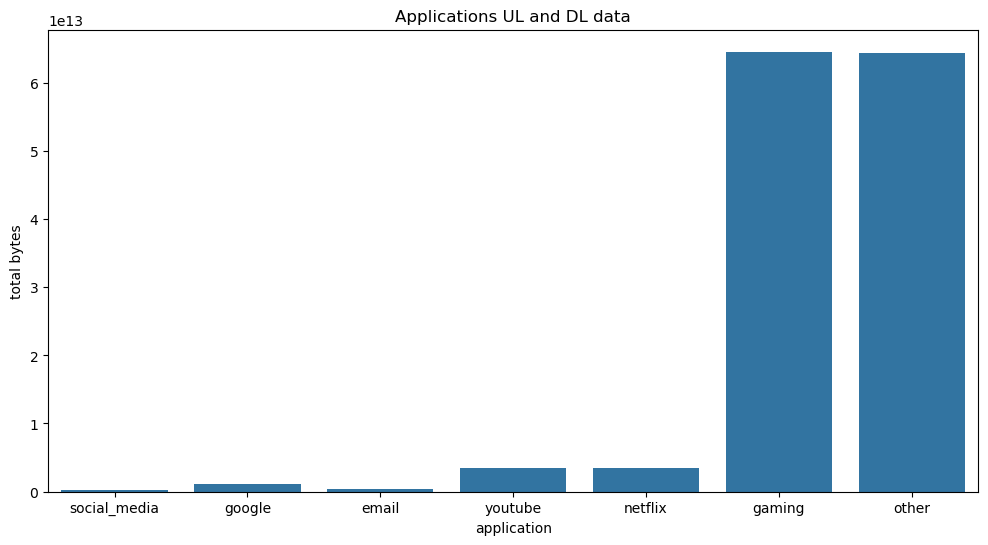

In [64]:
a = biv_data.tail(1)
long_df = pd.melt(a)
long_df = long_df.drop([6], axis  = 0)
plt.figure(figsize=(12,6))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('Applications UL and DL data')
plt.ylabel('total bytes')
plt.xlabel('application')

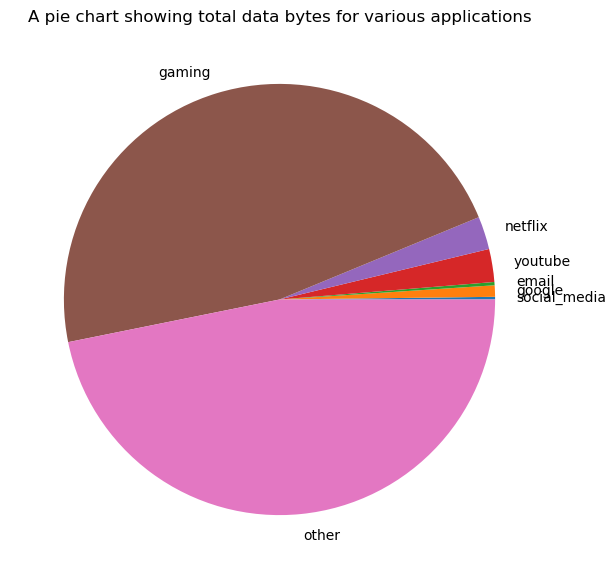

In [65]:
fig = plt.figure(figsize =(10, 7)) 
a = biv_data.drop(['total_bytes'], axis = 1)
plt.pie(a.loc['totals'], labels = a.columns)
plt.title('A pie chart showing total data bytes for various applications')
plt.show()

# One on one plots on the apps vs total_bytes

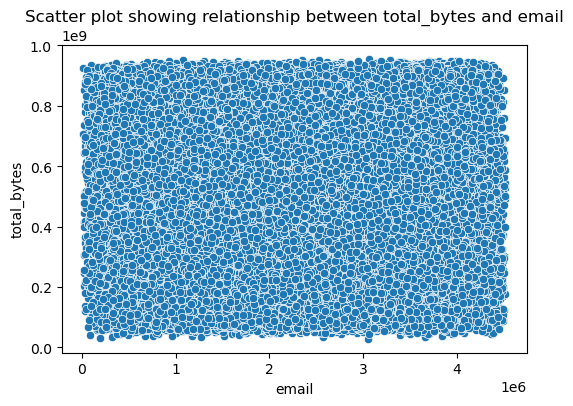

In [66]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='email', y='total_bytes')
plt.title('Scatter plot showing relationship between total_bytes and email')
plt.show()

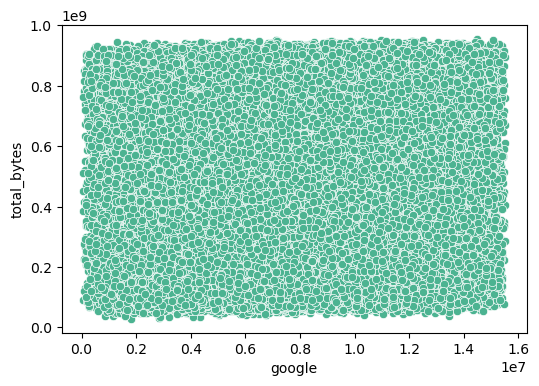

In [67]:
plt.figure(figsize=(6, 4))
# sns.jointplot(data = data, x='google', y='total_bytes', kind = 'hex', color = '#4CB391')
sns.scatterplot(data = data, x='google', y='total_bytes', color = '#4CB391')
# plt.title('Hexplot plot showing relationship between total_bytes and google', size=20)
plt.show()

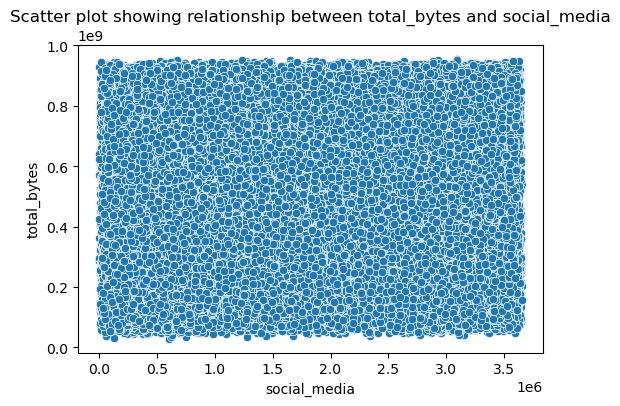

In [68]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='social_media', y='total_bytes')
plt.title('Scatter plot showing relationship between total_bytes and social_media')
plt.show()

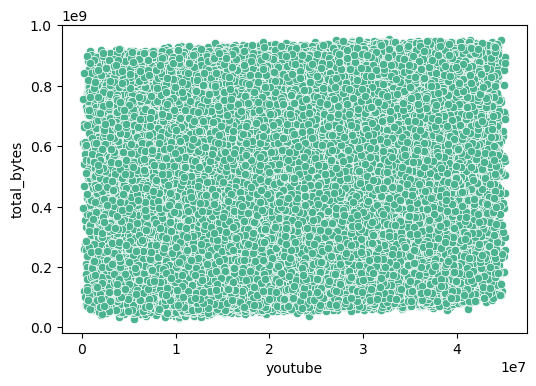

In [69]:
plt.figure(figsize=(6, 4))
# sns.jointplot(data = data, x='youtube', y='total_bytes', kind = 'hex', color = '#4CB391')
sns.scatterplot(data = data, x='youtube', y='total_bytes', color = '#4CB391')
# plt.title('Hexplot plot showing relationship between total_bytes and youtube')
plt.show()

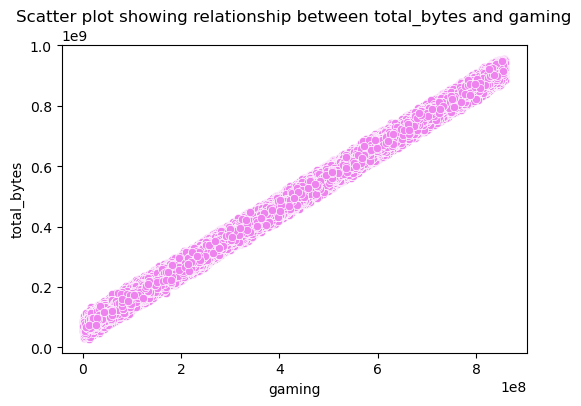

In [70]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='gaming', y='total_bytes', color = 'violet')
plt.title('Scatter plot showing relationship between total_bytes and gaming')
plt.show()

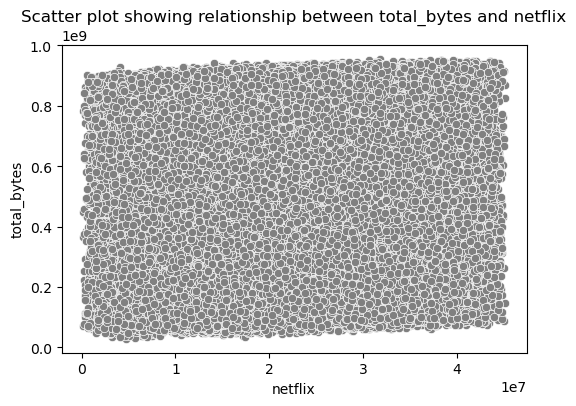

In [71]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='netflix', y='total_bytes', color = 'grey')
plt.title('Scatter plot showing relationship between total_bytes and netflix')
plt.show()

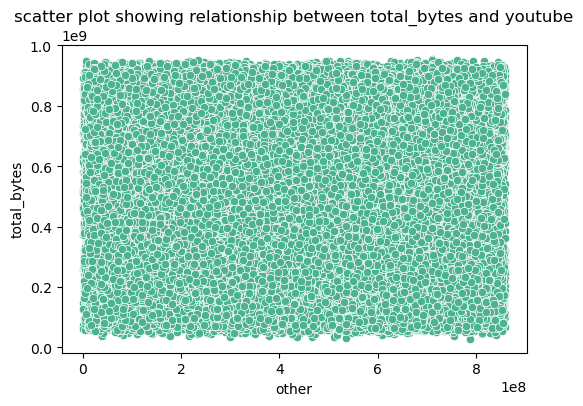

In [72]:
plt.figure(figsize=(6, 4))
# sns.jointplot(data = data, x='other', y='total_bytes', kind = 'hex', color = '#4CB391')
sns.scatterplot(data = data, x='other', y='total_bytes', color = '#4CB391')
plt.title('scatter plot showing relationship between total_bytes and youtube')
plt.show()

# Variable transformations

In [73]:
# adding Decile_rank column to the DataFrame 
data['Decile_rank'] = pd.qcut(data['Dur. (ms).1'], 5, labels = False) 
# data.columns

In [74]:
new_df = data[['Decile_rank', 'total_bytes']]
a = new_df.groupby('Decile_rank').sum()
a

total_bytes
Decile_rank              
0            1.488404e+13
1            1.492541e+13
2            1.478282e+13
3            1.485458e+13
4            1.491834e+13

Text(0.5, 0, 'decile rank')

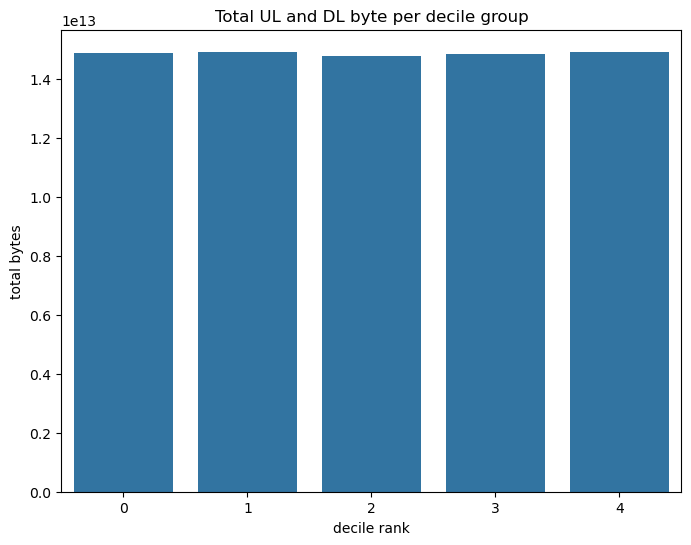

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x = a.index, y = a.total_bytes)
plt.title('Total UL and DL byte per decile group')
plt.ylabel('total bytes')
plt.xlabel('decile rank')

# Correlation Analysis

# correlation on the total bytes

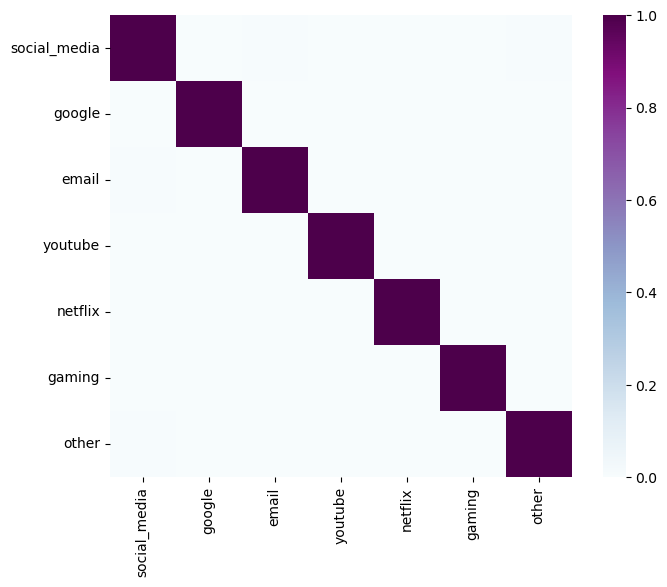

In [76]:
corr_data = data[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

# On the upload bytes

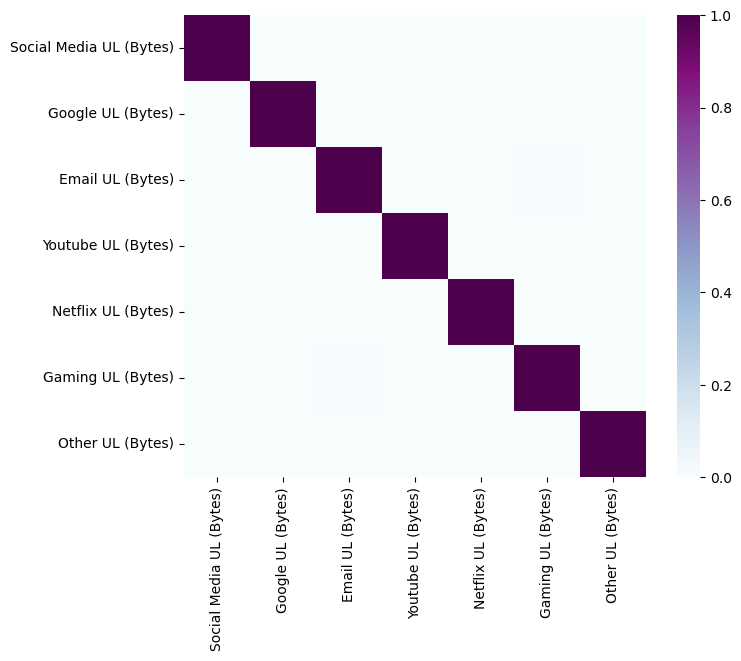

In [77]:
corr_data = data[['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

# On the download bytes

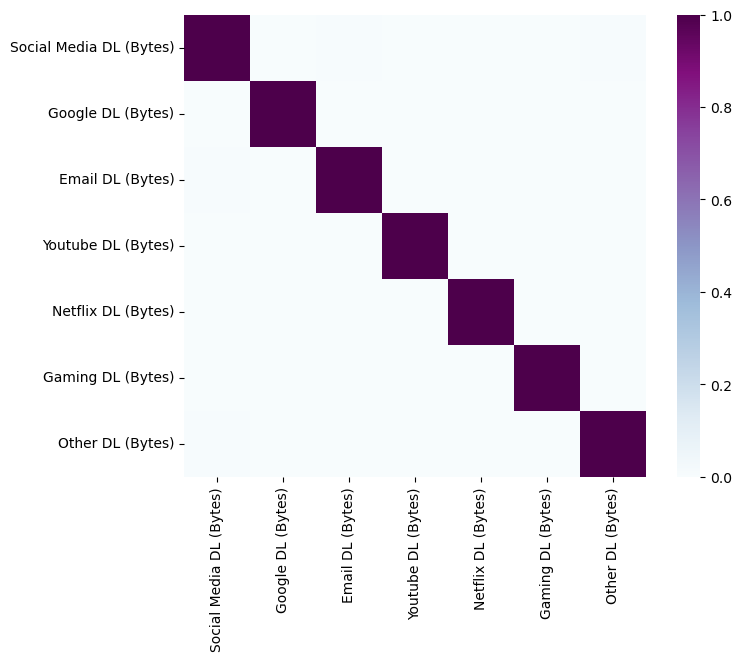

In [78]:
corr_data = data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

# Dimensionality Reduction

In [79]:
# standardize the data
from sklearn.preprocessing import StandardScaler


new_numerical = [] #this leaves out the categorical columns that were encoded but not replaced
for col in data.columns:
    if data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        new_numerical.append(col)
        
seg = data[new_numerical].copy()
seg = seg.drop(['MSISDN/Number'], axis = 1) #drop the id col
scaler = StandardScaler()
scaled_data = scaler.fit_transform(seg)

In [80]:
scaled_data.shape

(150001, 65)

In [81]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [82]:
pca.explained_variance_ratio_

array([1.24502388e-01, 7.68944932e-02, 5.16071431e-02, 4.46465366e-02,
       3.92207289e-02, 3.43673013e-02, 3.14137898e-02, 3.10493759e-02,
       3.08880251e-02, 3.07676641e-02, 3.05836115e-02, 3.03600125e-02,
       2.84244825e-02, 2.78298496e-02, 2.56357374e-02, 2.30241096e-02,
       2.24158653e-02, 2.14754739e-02, 1.80123827e-02, 1.72478317e-02,
       1.55355324e-02, 1.54978643e-02, 1.54318440e-02, 1.53799820e-02,
       1.53605065e-02, 1.52839928e-02, 1.52354955e-02, 1.52220051e-02,
       1.49303874e-02, 1.40850519e-02, 1.35099700e-02, 1.31713271e-02,
       1.14941193e-02, 1.11806075e-02, 9.50550704e-03, 8.14058802e-03,
       7.49764292e-03, 6.46922623e-03, 5.79711843e-03, 4.47153548e-03,
       4.43221493e-03, 4.17050699e-03, 2.71924638e-03, 2.38389860e-03,
       1.24273789e-03, 9.80172796e-04, 2.52617928e-04, 1.77874566e-04,
       5.95304620e-05, 1.38879076e-05, 2.04845118e-07, 1.14973341e-13,
       1.01365737e-26, 2.45537666e-32, 1.30725408e-32, 5.11152680e-33,
      

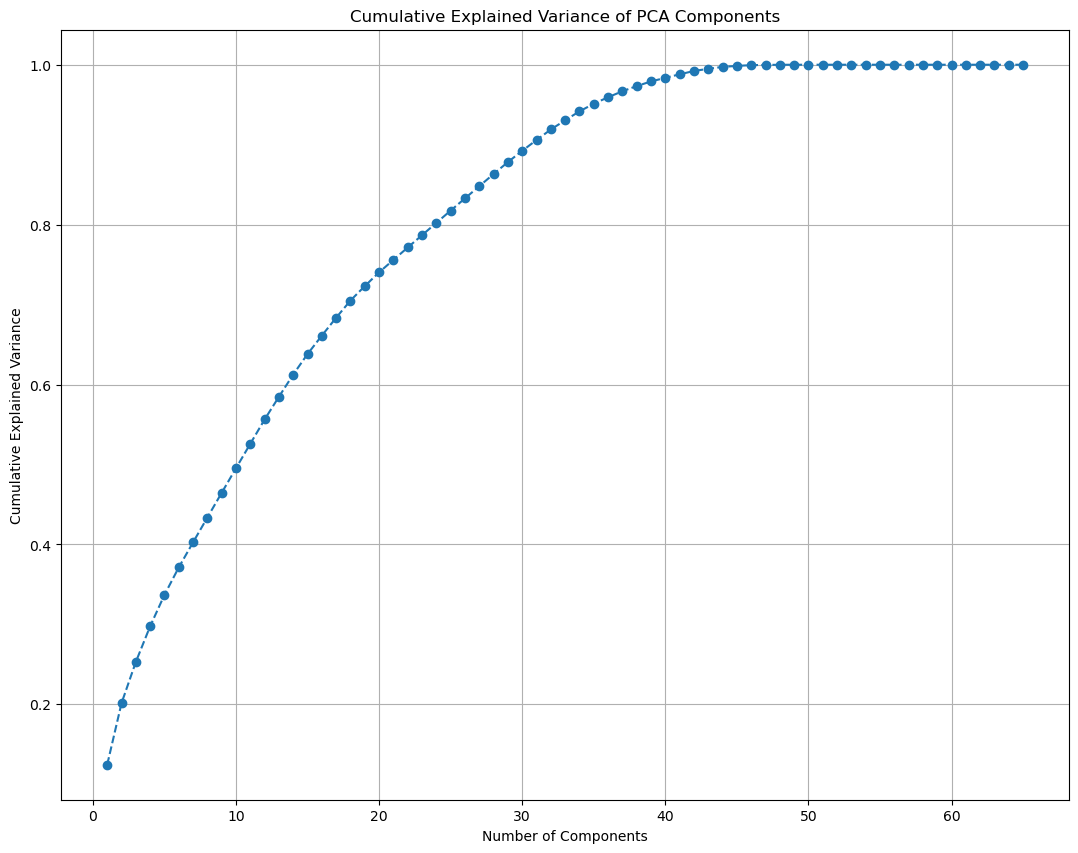

In [83]:
import matplotlib.pyplot as plt

# Assuming 'pca' is your fitted PCA object

plt.figure(figsize=(13, 10))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance of PCA Components')  # Add a title
plt.xlabel('Number of Components')  # More descriptive x-axis label
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [84]:
pca = PCA(n_components = 23)
pca.fit(scaled_data)

PCA(n_components=23)

In [85]:
pca_scores = pca.transform(scaled_data)

In [86]:
# new_data_df = pd.concat([seg.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
# c.columns.values[-2:] = ['component1', 'component2']
# new_data_df.head() #contains the original cols 

a = pd.DataFrame(pca_scores)
a['MSISDN/Number'] = data['MSISDN/Number']
a.head()

0         1          2         3         4         5         6  \
0 -4.293264  1.382136  16.993973 -6.668346  0.604636 -9.837705 -0.567834   
1 -3.436852 -1.820971  12.563522 -4.935298 -3.280666 -6.820605  0.880441   
2 -3.483354  1.708407  12.559987 -4.865607 -0.215303 -6.945670  0.745164   
3 -3.408500 -3.548231  12.213857 -4.789074 -0.840510 -6.644269  1.948783   
4 -3.031201 -0.980149   9.966763 -3.831384 -0.413020 -5.267123  1.192637   

          7         8         9  ...        14        15        16        17  \
0  1.409257  1.845695  1.104517  ...  0.828392  1.180785 -0.636546 -0.757706   
1  0.070173 -0.988782  2.198820  ...  0.760621  0.672298  1.235252 -0.663069   
2  0.518967  0.559095 -1.433537  ...  0.696995  0.700972  2.681906 -0.682932   
3 -0.123605 -2.320609 -1.608249  ...  0.784635  0.692396  0.321298 -0.623756   
4  0.210025 -1.416139 -0.134860  ...  0.568908  0.563521  0.763461 -0.526450   

         18        19        20        21        22  MSISDN/Number  
0 -0.566198  0.781429  0.002057  0.809554  1.372538   3.366496e+10  
1  0.911755 -0.409922  1.441691 -1.047517 -0.653335   3.368185e+10  
2  0.082325 -0.954103 -0.011118 -0.541193 -0.208013   3.376063e+10  
3  1.143449 -0.830241 -0.514436  0.223498  0.413882   3.375034e+10  
4  0.070453  1.198310  0.207723 -1.827975  0.737269   3.369980e+10  

[5 rows x 24 columns]

<Axes: xlabel='0', ylabel='1'>

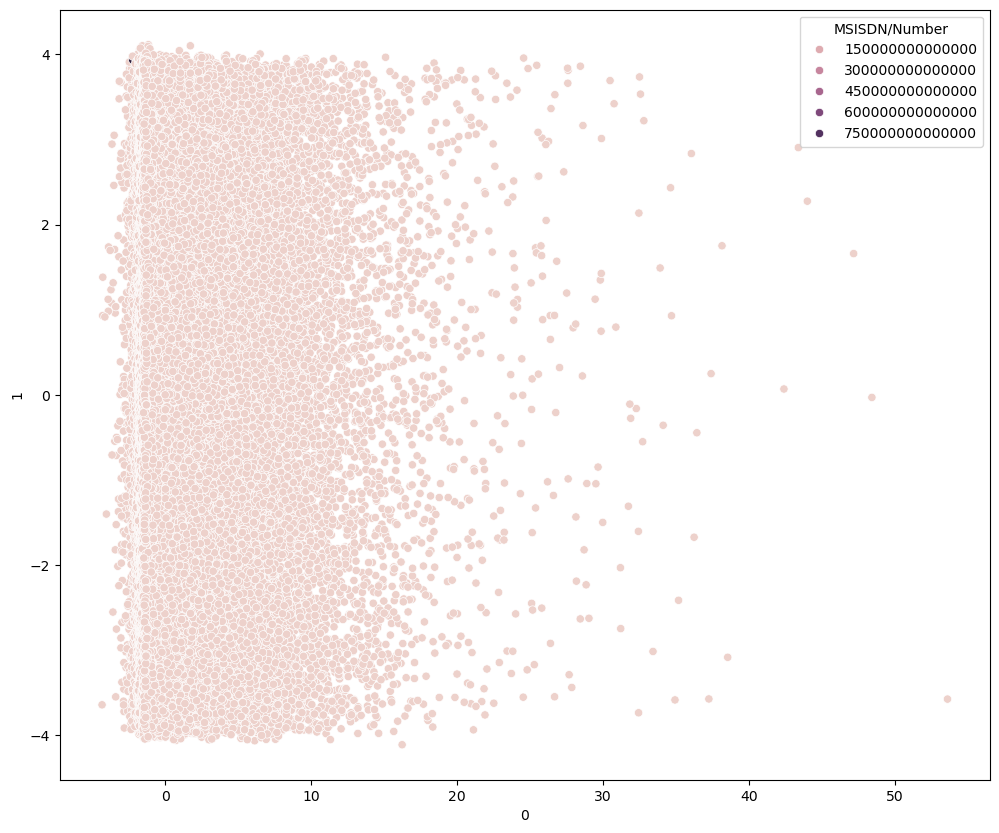

In [87]:
#plotting the first 2 components since they explain most of the variability.
plt.figure(figsize=(12,10))
sns.scatterplot(x= a[0], y = a[1], hue = a['MSISDN/Number'])

# User Engagement analysis

In [88]:
# data.columns
# data['MSISDN/Number'].nunique()

# Sessions frequency, sessions duration, sessions total traffic.

In [89]:
user_data = data[['MSISDN/Number', 'total_bytes', 'Dur. (ms).1', 'Bearer Id']]

# def f(x):
#     d = {}
#     d['total_bytes'] = x['total_bytes'].sum()
#     d['Dur. (ms).1'] = x['Dur. (ms).1'].sum()
#     d['Bearer Id'] = x['Bearer Id'].count()
#     return pd.Series(d, index=['total_bytes', 'Dur. (ms).1', 'Bearer Id'])

# user_data.groupby('MSISDN/Number').apply(f)

In [90]:
agg_user_data = user_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',  'total_bytes': 'sum'})
agg_user_data.columns = ['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)']
agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10               1            116720140.0             8.786906e+08
3.360100e+10               1            181230963.0             1.568596e+08
3.360100e+10               1            134969374.0             5.959665e+08
3.360101e+10               1             49878024.0             4.223207e+08
3.360101e+10               2             37104453.0             1.457411e+09

# Top 10 users with high sessions frequency

Text(0.5, 1.0, 'a barplot indicating 10 users with highest number of sessions')

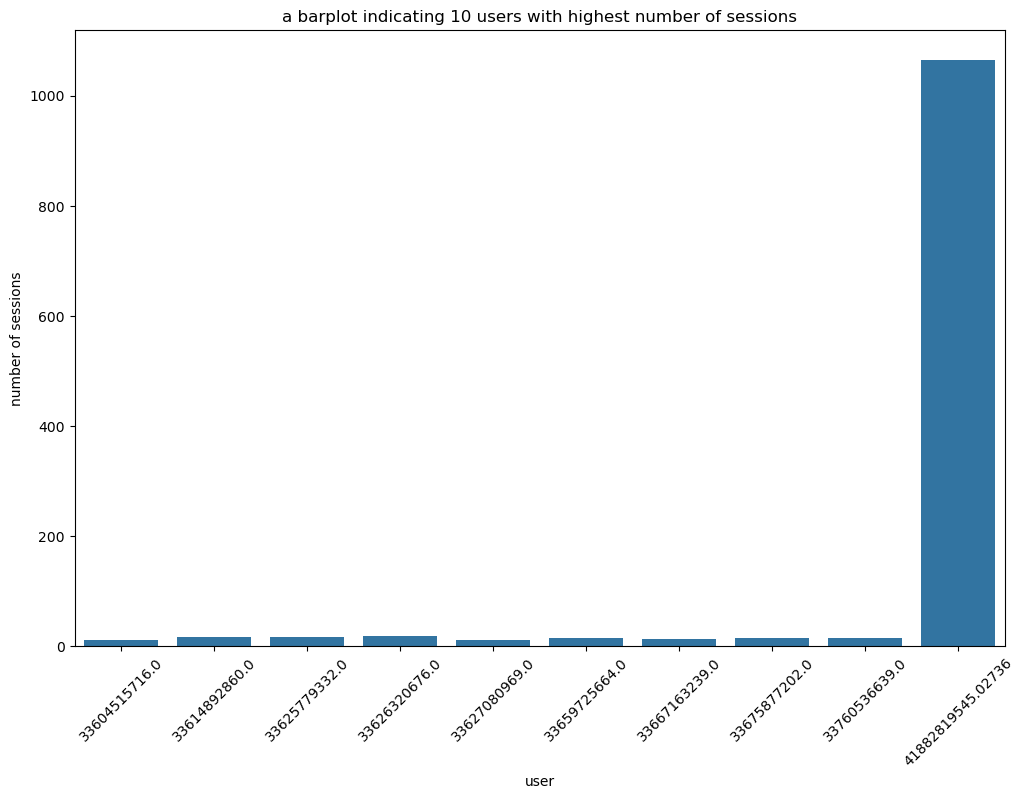

In [91]:
a = agg_user_data.sort_values(by = 'sessions_freq', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = a.index, y = a['sessions_freq'])
plt.ylabel('number of sessions')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest number of sessions')

# Top 10 users with high sessions traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest sessions traffic')

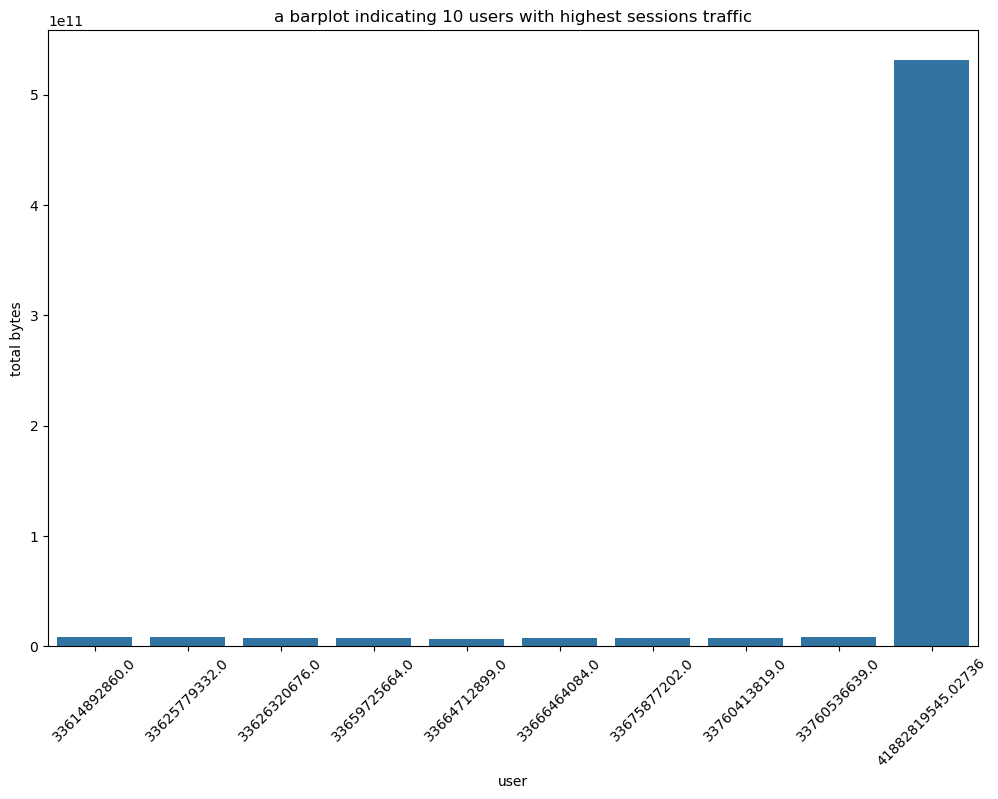

In [92]:
b = agg_user_data.sort_values(by = 'sessions_traffic(bytes)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['sessions_traffic(bytes)'])
plt.ylabel('total bytes')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest sessions traffic')

# Top 10 users with longest sessions duration

Text(0.5, 1.0, 'a barplot indicating 10 users with longest sessions duration')

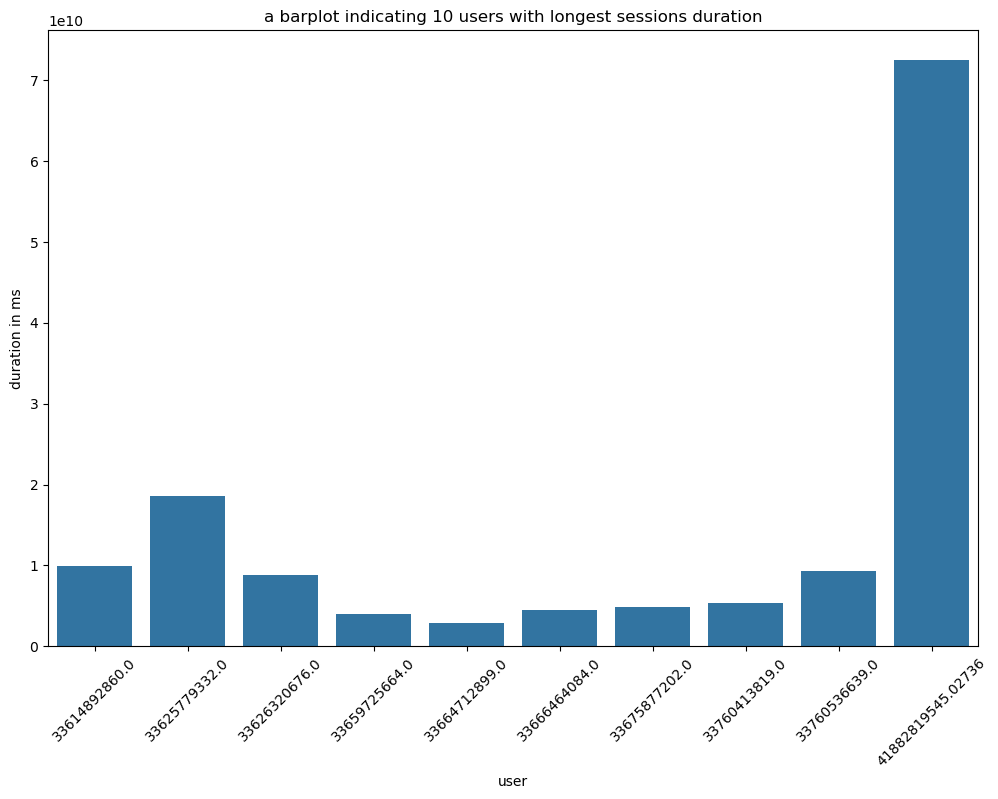

In [93]:
c = agg_user_data.sort_values(by = 'sessions_duration(ms)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['sessions_duration(ms)'])
plt.ylabel('duration in ms')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with longest sessions duration')

In [94]:
# users in the 3 categories.
a = a.index.to_list()
b = b.index.to_list()
c = c.index.to_list()

def IntersecOfSets(arr1, arr2, arr3): 
    s1 = set(arr1) 
    s2 = set(arr2) 
    s3 = set(arr3) 

    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3) 
      
    final_list = list(result_set) 
    print(final_list) 
  
IntersecOfSets(a, b, c) 

[33625779332.0, 33626320676.0, 41882819545.02736, 33614892860.0, 33760536639.0]


# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [95]:
# Normalizing the aggregated dataset using log transformation
norm_agg_user_data = np.log1p(agg_user_data)
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10        0.693147              18.575290                20.593943
3.360100e+10        0.693147              19.015283                18.870862
3.360100e+10        0.693147              18.720558                20.205695
3.360101e+10        0.693147              17.725091                19.861276
3.360101e+10        1.098612              17.429248                21.099927

In [96]:
norm_agg_user_data.shape

(106857, 3)

In [97]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_agg_user_data)
kmeans_data = kmeans.predict(norm_agg_user_data)

In [98]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(kmeans_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               clusters  
MSISDN/Number            
3.360100e+10          0  
3.360100e+10          2  
3.360100e+10          0  
3.360101e+10          1  
3.360101e+10          1

<Axes: >

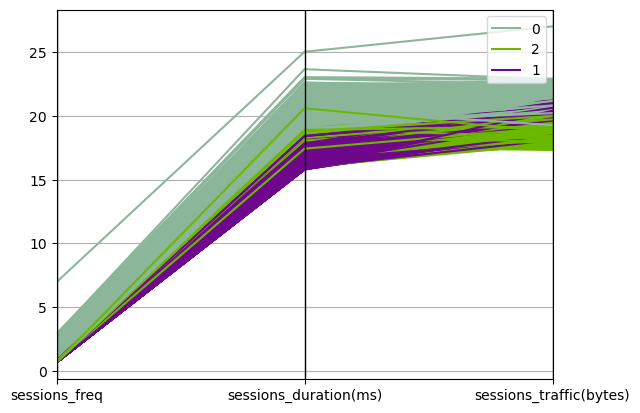

In [99]:
#plot the clusters(3D)
pd.plotting.parallel_coordinates(norm_agg_user_data, 'clusters')

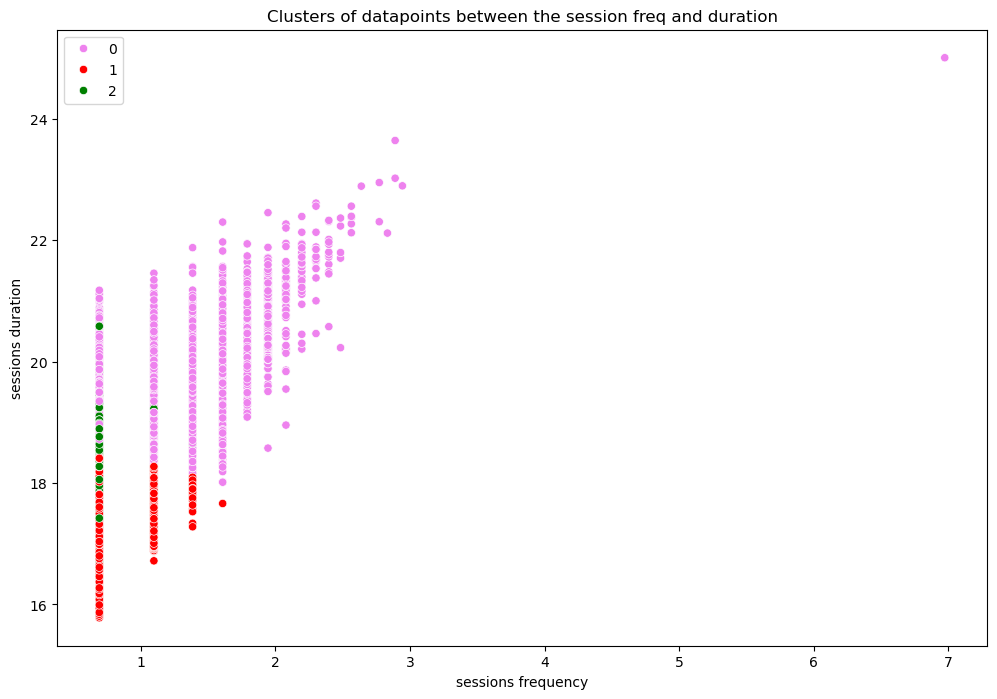

In [100]:
# comparing the clusters in variable pairs

# frequency and duration
x = norm_agg_user_data[['sessions_freq', 'sessions_duration(ms)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_duration(ms)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and duration')
plt.xlabel('sessions frequency')
plt.ylabel('sessions duration')
plt.legend()

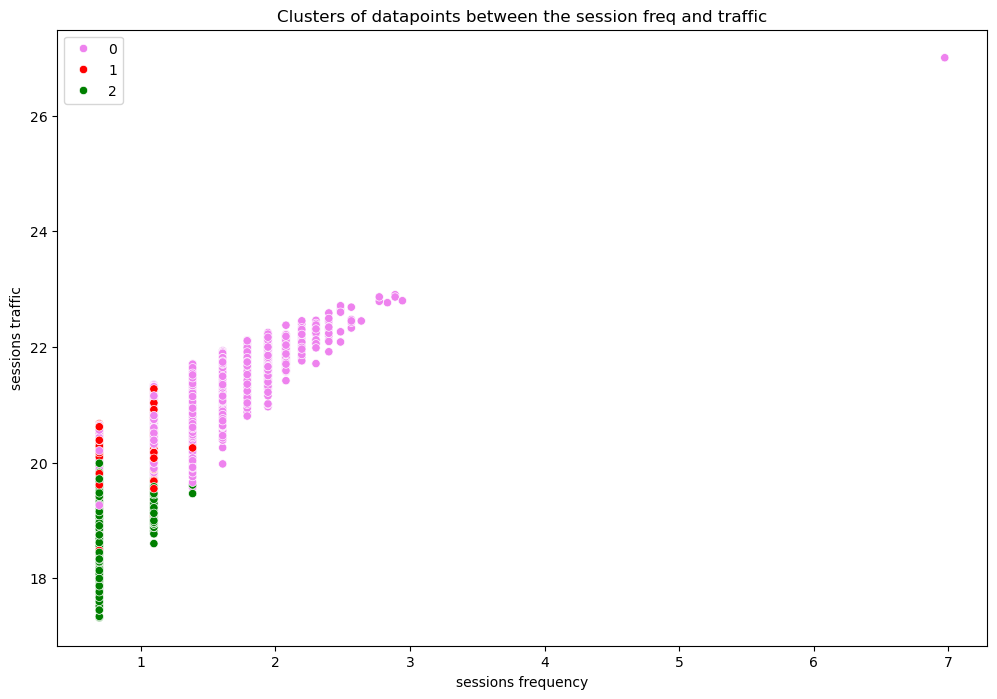

In [101]:
# comparing the clusters in variable pairs

# frequency and traffic
x = norm_agg_user_data[['sessions_freq', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and traffic')
plt.xlabel('sessions frequency')
plt.ylabel('sessions traffic')
plt.legend()

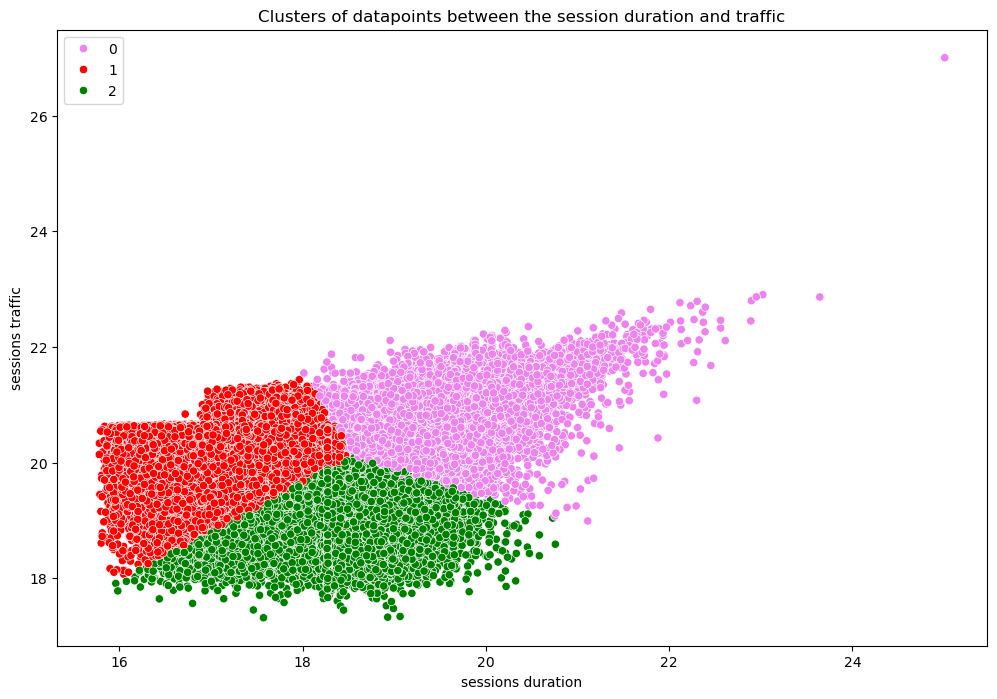

In [102]:
# comparing the clusters in variable pairs

# duration and traffic
x = norm_agg_user_data[['sessions_duration(ms)', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_duration(ms)'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session duration and traffic')
plt.xlabel('sessions duration')
plt.ylabel('sessions traffic')
plt.legend()

# Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text.

In [103]:
# add the clusters column to the non normalized data
agg_user_data['clusters'] = kmeans_data
agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10               1            116720140.0             8.786906e+08   
3.360100e+10               1            181230963.0             1.568596e+08   
3.360100e+10               1            134969374.0             5.959665e+08   
3.360101e+10               1             49878024.0             4.223207e+08   
3.360101e+10               2             37104453.0             1.457411e+09   

               clusters  
MSISDN/Number            
3.360100e+10          0  
3.360100e+10          2  
3.360100e+10          0  
3.360101e+10          1  
3.360101e+10          1

In [104]:
agg_user_data.clusters.value_counts()

clusters
0    39722
1    38523
2    28612
Name: count, dtype: int64

In [105]:
# cluster 1 (cluster = 0)
cluster_1 = agg_user_data.loc[agg_user_data['clusters'] == 0]   #get observations under cluster 1
# cluster_1.loc['total_per_metric'] = cluster_1.sum()             #get the totals per metric
print(cluster_1.shape)
cluster_1.tail()

(39722, 4)


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.378996e+10               1           1.570699e+08             7.102876e+08   
3.378998e+10               2           2.103901e+08             1.094693e+09   
4.188282e+10            1066           7.255155e+10             5.317447e+11   
3.197021e+12               1           8.773853e+08             2.321240e+08   
3.370000e+14               1           2.530302e+08             5.962878e+08   

               clusters  
MSISDN/Number            
3.378996e+10          0  
3.378998e+10          0  
4.188282e+10          0  
3.197021e+12          0  
3.370000e+14          0

In [106]:
cluster_1.describe() # get the min, max and average per metric in cluster 1

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count    39722.00000           3.972200e+04             3.972200e+04   39722.0
mean         1.95534           2.544392e+08             1.062835e+09       0.0
std          5.44738           4.492786e+08             2.721158e+09       0.0
min          1.00000           6.659556e+07             1.770069e+08       0.0
25%          1.00000           1.491170e+08             6.807656e+08       0.0
50%          2.00000           1.853585e+08             8.735833e+08       0.0
75%          2.00000           2.795536e+08             1.280620e+09       0.0
max       1066.00000           7.255155e+10             5.317447e+11       0.0

In [107]:
# cluster 2 (cluster = 1)
cluster_2 = agg_user_data.loc[agg_user_data['clusters'] == 1]   #get observations under cluster 2
# cluster_2.loc['total_per_metric'] = cluster_2.sum()             #get the totals per metric
print(cluster_2.shape)
cluster_2.tail()

(38523, 4)


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.378991e+10               1             44199417.0              902088414.0   
3.378991e+10               1             98294048.0              534066910.0   
3.378992e+10               1             54339643.0              576824365.0   
3.378996e+10               1             98826284.0              645777687.0   
3.379000e+10               1              8810688.0              714641641.0   

               clusters  
MSISDN/Number            
3.378991e+10          1  
3.378991e+10          1  
3.378992e+10          1  
3.378996e+10          1  
3.379000e+10          1

In [108]:
cluster_2.describe() # get the min, max and average per metric in cluster 2

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   38523.000000           3.852300e+04             3.852300e+04   38523.0
mean        1.112374           5.593215e+07             6.444320e+08       1.0
std         0.319264           2.901072e+07             2.436750e+08       0.0
min         1.000000           7.142988e+06             7.051602e+07       1.0
25%         1.000000           2.871578e+07             4.880104e+08       1.0
50%         1.000000           5.461318e+07             6.407455e+08       1.0
75%         1.000000           8.639990e+07             7.954079e+08       1.0
max         4.000000           1.130871e+08             2.034468e+09       1.0

In [109]:
# cluster 3 (cluster = 2)
cluster_3 = agg_user_data.loc[agg_user_data['clusters'] == 2]   #get observations under cluster 3
# cluster_3.loc['total_per_metric'] = cluster_3.sum()             #get the totals per metric
print(cluster_3.shape)
cluster_3.tail()

(28612, 4)


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.378991e+10               1             86399921.0              366089210.0   
3.378994e+10               1             36812757.0              193917233.0   
3.378997e+10               1            160461578.0              208123067.0   
3.379000e+10               1            140988659.0              480307335.0   
8.823971e+14               1            869844200.0              139153646.0   

               clusters  
MSISDN/Number            
3.378991e+10          2  
3.378994e+10          2  
3.378997e+10          2  
3.379000e+10          2  
8.823971e+14          2

In [110]:
cluster_3.describe() # get the min, max and average per metric in cluster 3

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   28612.000000           2.861200e+04             2.861200e+04   28612.0
mean        1.030302           1.198785e+08             2.558993e+08       2.0
std         0.171827           6.038505e+07             1.157003e+08       0.0
min         1.000000           8.550664e+06             3.324901e+07       2.0
25%         1.000000           8.639991e+07             1.560280e+08       2.0
50%         1.000000           1.032405e+08             2.479563e+08       2.0
75%         1.000000           1.489732e+08             3.487405e+08       2.0
max         3.000000           1.035262e+09             5.446107e+08       2.0

#  Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [111]:
apps_traffic = data[['social_media', 'netflix', 'youtube', 'google', 'email', 'gaming', 'other', 'MSISDN/Number']]
apps_traffic.tail()

social_media      netflix      youtube        google         email  \
149996  3.517065e+06  37561864.00  27955095.00  1.278491e+07  6.908760e+05   
149997  2.352181e+06  40643294.00  22165518.00  4.415361e+06  2.121718e+06   
149998  1.260239e+06  15029702.00  24516413.00  6.585469e+06  2.058277e+06   
149999  8.231090e+05  16494842.00  17122508.00  7.757267e+06  2.850914e+06   
150000  1.828250e+06  22628606.54  22643482.63  7.807295e+06  2.259102e+06   

              gaming         other  MSISDN/Number  
149996  5.358069e+08  1.675193e+07   3.365069e+10  
149997  6.316281e+08  7.146381e+08   3.366345e+10  
149998  5.669338e+08  1.324156e+08   3.362189e+10  
149999  3.550664e+08  8.161200e+08   3.361962e+10  
150000  4.303331e+08  4.293653e+08   4.188282e+10

In [112]:
agg_apps_traffic = apps_traffic.groupby('MSISDN/Number').agg({'social_media':'sum', 'netflix':'sum', 'youtube':'sum', 'gaming':'sum', 
                                                            'google':'sum', 'email':'sum', 'other':'sum'})
agg_apps_traffic.head()

social_media     netflix     youtube        gaming      google  \
MSISDN/Number                                                                   
3.360100e+10      2232135.0  27180981.0  21624548.0  8.124587e+08   4389005.0   
3.360100e+10      2660565.0  11221763.0  12432223.0  1.197501e+08   5334863.0   
3.360100e+10      3195623.0  19353900.0  21333570.0  5.388277e+08   3443126.0   
3.360101e+10       280294.0   1942092.0   6977321.0  3.911261e+08   9678493.0   
3.360101e+10      2912542.0  49201724.0  41533002.0  1.314798e+09  18499616.0   

                   email        other  
MSISDN/Number                          
3.360100e+10   1331362.0  386570872.0  
3.360100e+10   3307781.0  281710071.0  
3.360100e+10   3205380.0  501693672.0  
3.360101e+10   2284670.0   35279702.0  
3.360101e+10   3305469.0  804804484.0

# 10 users with highest social media traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest social_media traffic')

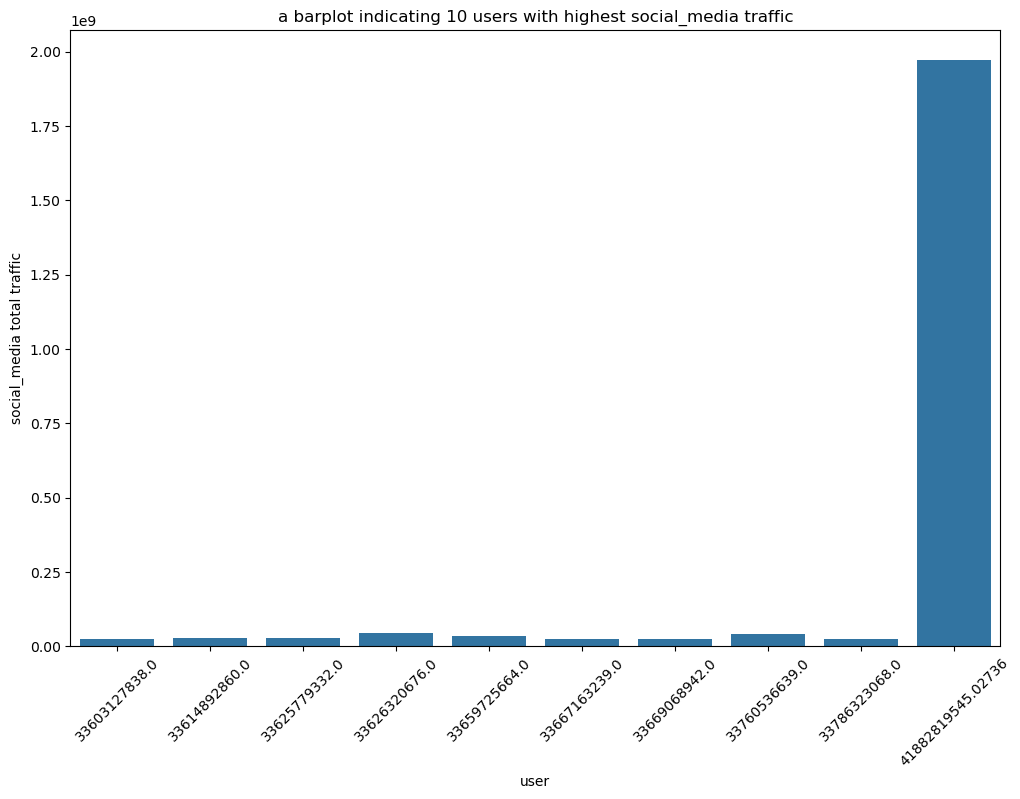

In [113]:
b = agg_apps_traffic.sort_values(by = 'social_media', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['social_media'])
plt.ylabel('social_media total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest social_media traffic')

# 10 users with highest netflix traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest netflix traffic')

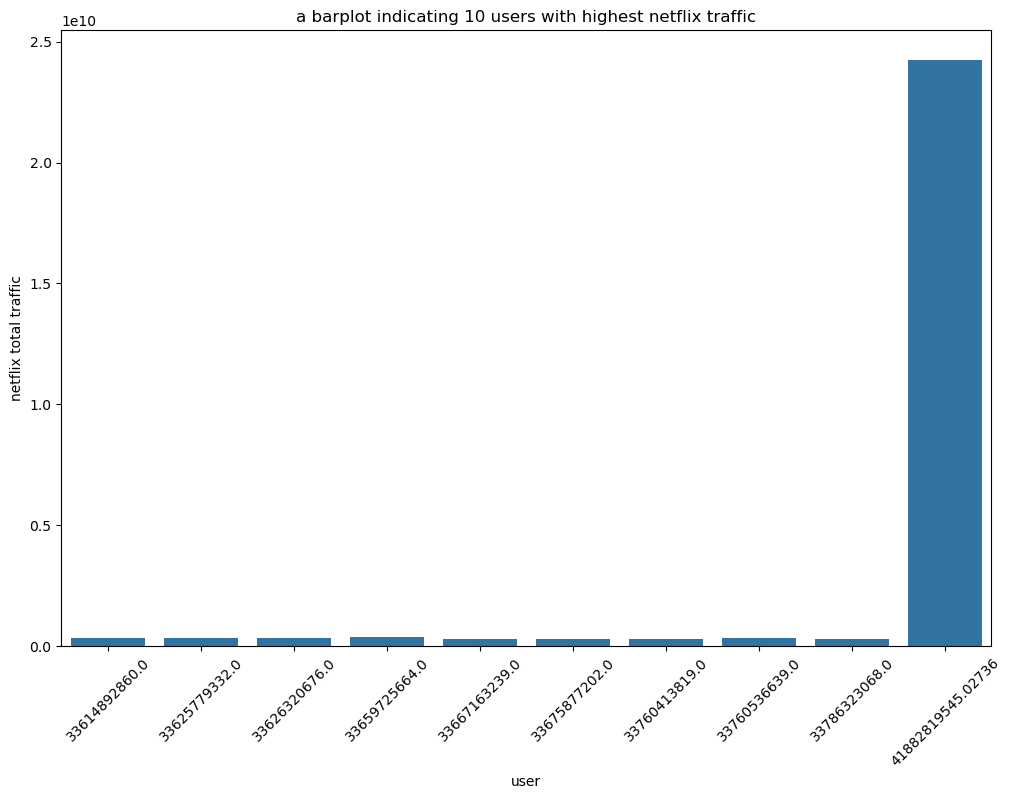

In [114]:
c = agg_apps_traffic.sort_values(by = 'netflix', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = c.index, y = c['netflix'])
plt.ylabel('netflix total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest netflix traffic')

# 10 users with highest gaming traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest gaming traffic')

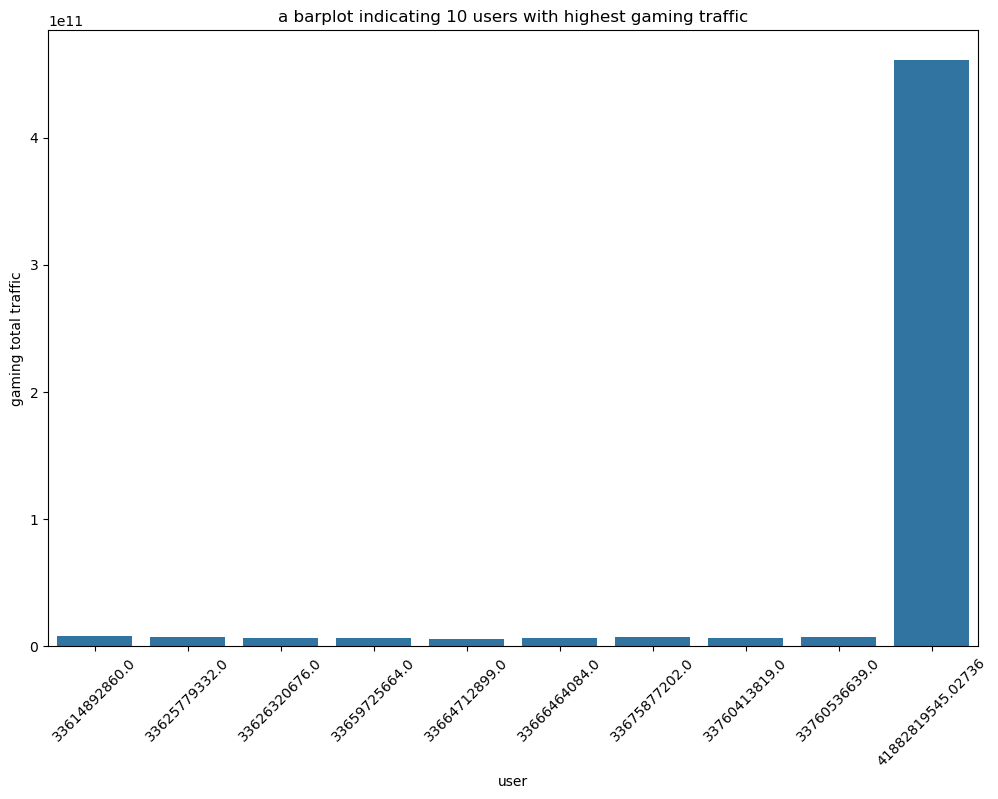

In [115]:
d = agg_apps_traffic.sort_values(by = 'gaming', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = d.index, y = d['gaming'])
plt.ylabel('gaming total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest gaming traffic')

# 10 users with highest google traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest google traffic')

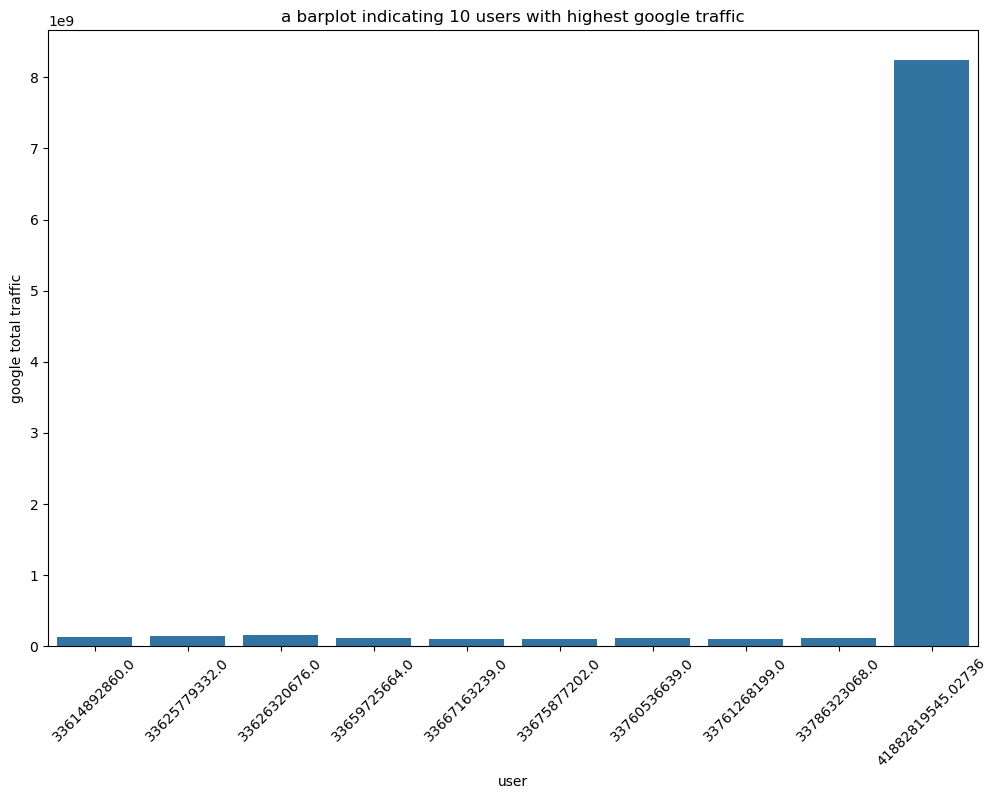

In [116]:
e = agg_apps_traffic.sort_values(by = 'google', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = e.index, y = e['google'])
plt.ylabel('google total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest google traffic')

# 10 users with highest email traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest email traffic')

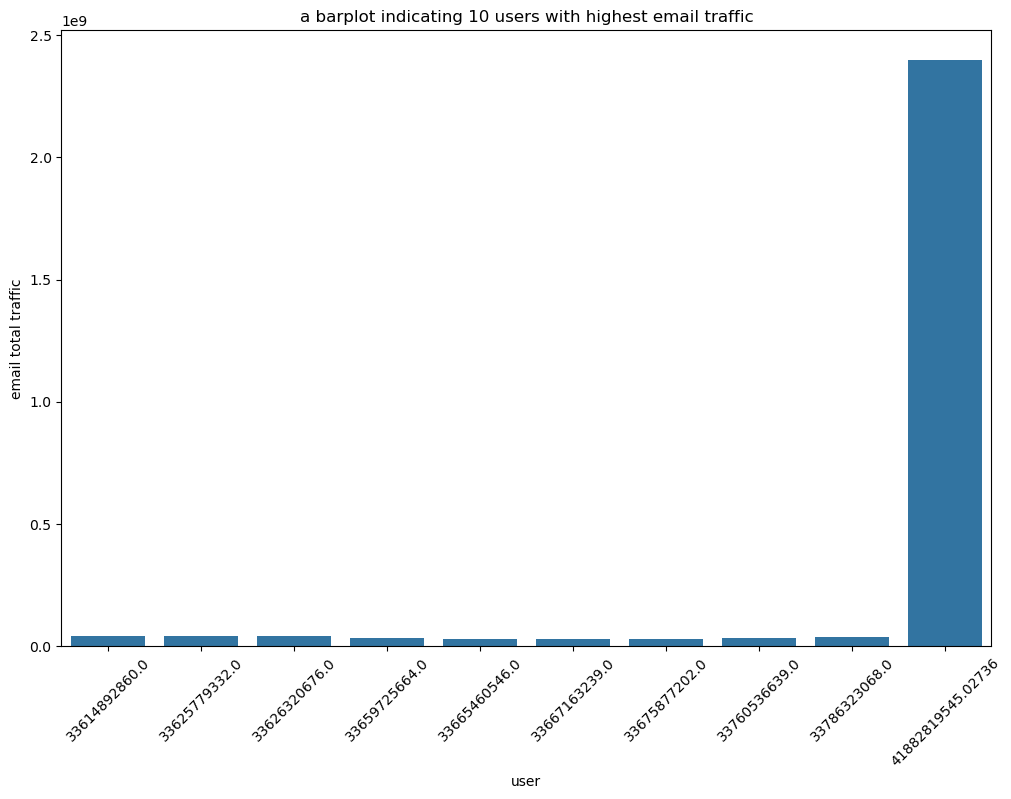

In [117]:
f = agg_apps_traffic.sort_values(by = 'email', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = f.index, y = f['email'])
plt.ylabel('email total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest email traffic')

# 10 users with highest youtube traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest youtube traffic')

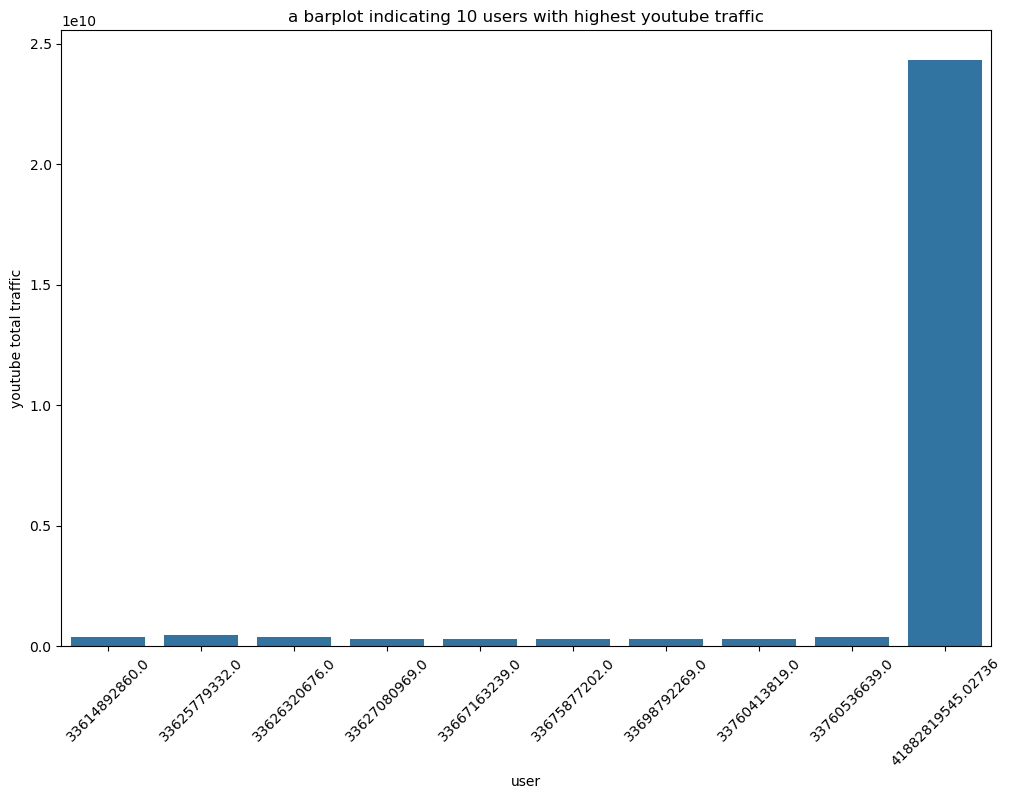

In [118]:
g = agg_apps_traffic.sort_values(by = 'youtube', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = g.index, y = g['youtube'])
plt.ylabel('youtube total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest youtube traffic')

# 10 users with highest other traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest other traffic')

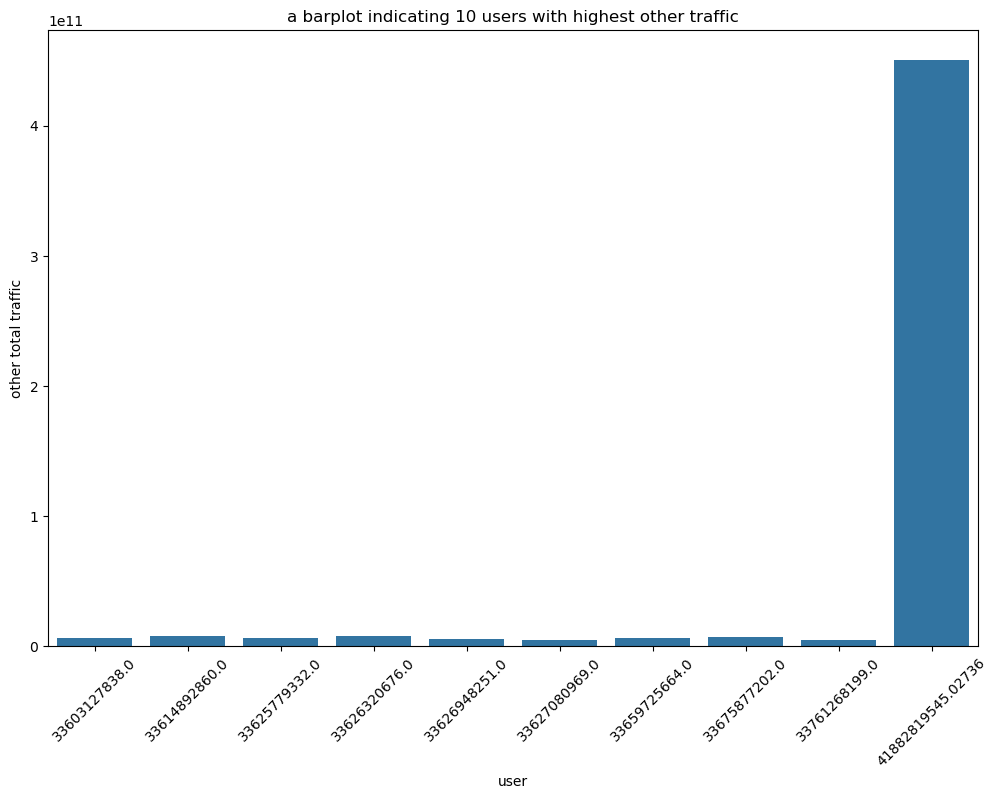

In [119]:
h = agg_apps_traffic.sort_values(by = 'other', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = h.index, y = h['other'])
plt.ylabel('other total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest other traffic')

In [120]:
# users in the 3 categories.
b = b.index.to_list()
c = c.index.to_list()
d = d.index.to_list()
e = e.index.to_list()
f = f.index.to_list()
g = g.index.to_list()
h = h.index.to_list()


def IntersecOfSets(arr1, arr2, arr3, arr4, arr5, arr6, arr7): 
    s1 = set(arr1) 
    s2 = set(arr2) 
    s3 = set(arr3) 
    s4 = set(arr4)
    s5 = set(arr5)
    s6 = set(arr6)
    s7 = set(arr7)

    set1 = s1.intersection(s2)
    set2 = set1.intersection(s3) 
    set3 = set2.intersection(s4)
    set4 = set3.intersection(s5) 
    set5 = set4.intersection(s6) 
    set6 = set5.intersection(s7) 
      
    final_list = list(set6) 
    print(final_list) 
  
IntersecOfSets(b, c, d, e, f, g, h) 

[41882819545.02736, 33614892860.0, 33625779332.0, 33626320676.0]


# Plot the top 3 most used applications.

In [121]:
agg_apps_traffic.loc['total_app_traffic'] = agg_apps_traffic.sum()  
agg_apps_traffic.tail()

social_media       netflix       youtube        gaming  \
MSISDN/Number                                                                
41882819545.027359  1.973817e+09  2.425357e+10  2.434073e+10  4.614780e+11   
3197020876596.0     7.152240e+05  2.659230e+07  1.195990e+07  1.780487e+08   
337000037000919.0   5.215660e+05  3.090504e+07  3.673494e+07  5.101427e+08   
882397108489451.0   1.546088e+06  2.884623e+07  4.094071e+07  4.307026e+07   
total_app_traffic   2.742394e+11  3.394314e+12  3.396545e+12  6.455040e+13   

                          google         email         other  
MSISDN/Number                                                 
41882819545.027359  8.248577e+09  2.399880e+09  4.509784e+11  
3197020876596.0     1.043866e+07  1.520771e+06  4.705265e+08  
337000037000919.0   9.830617e+06  3.318582e+06  1.491884e+08  
882397108489451.0   9.218647e+06  3.330974e+06  4.013605e+08  
total_app_traffic   1.171102e+12  3.388676e+11  6.440523e+13

Text(0.5, 0, 'application')

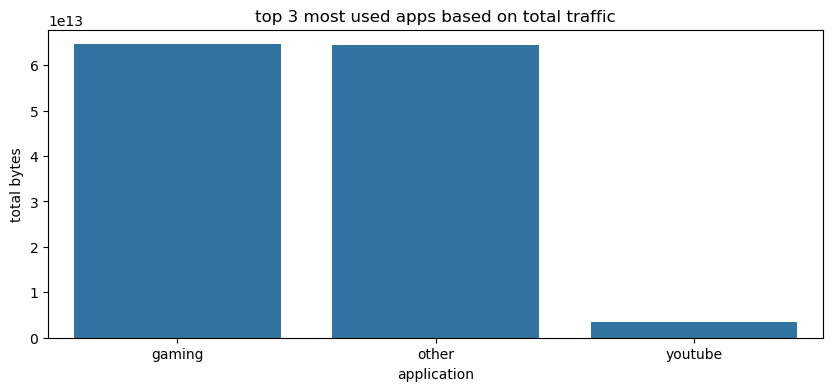

In [122]:
a = agg_apps_traffic.tail(1)
long_df = pd.melt(a)
long_df = long_df.sort_values(by = 'value', ascending = False).head(3)
plt.figure(figsize=(10,4))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('top 3 most used apps based on total traffic')
plt.ylabel('total bytes')
plt.xlabel('application')

# Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

In [123]:
# the user engagement metrics df (already normalized due to different units of measurement)
norm_agg_user_data = norm_agg_user_data.drop(['clusters'], axis = 1)
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10        0.693147              18.575290                20.593943
3.360100e+10        0.693147              19.015283                18.870862
3.360100e+10        0.693147              18.720558                20.205695
3.360101e+10        0.693147              17.725091                19.861276
3.360101e+10        1.098612              17.429248                21.099927

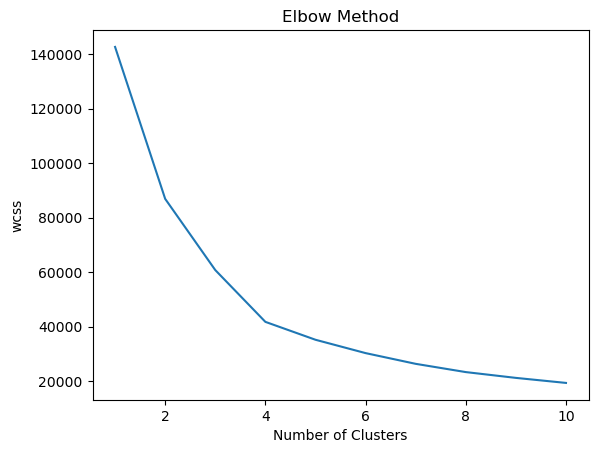

In [124]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_user_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [125]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = y_means
# agg_user_data = agg_user_data.drop(['clusetrs'], axis = 1)
agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10               1            116720140.0             8.786906e+08   
3.360100e+10               1            181230963.0             1.568596e+08   
3.360100e+10               1            134969374.0             5.959665e+08   
3.360101e+10               1             49878024.0             4.223207e+08   
3.360101e+10               2             37104453.0             1.457411e+09   

               clusters  
MSISDN/Number            
3.360100e+10          0  
3.360100e+10          3  
3.360100e+10          0  
3.360101e+10          1  
3.360101e+10          1

In [126]:
#clusters df
cluster_1 = agg_user_data[agg_user_data.clusters == 0]
cluster_2 = agg_user_data[agg_user_data.clusters == 1]
cluster_3 = agg_user_data[agg_user_data.clusters == 2]
cluster_4 = agg_user_data[agg_user_data.clusters == 3]

In [127]:
# descriptions
cluster_1.describe()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   46138.000000           4.613800e+04             4.613800e+04   46138.0
mean        1.192770           1.174443e+08             6.867858e+08       0.0
std         0.402904           4.481643e+07             2.315831e+08       0.0
min         1.000000           4.160388e+07             3.463538e+08       0.0
25%         1.000000           8.639991e+07             5.120211e+08       0.0
50%         1.000000           1.020788e+08             6.640130e+08       0.0
75%         1.000000           1.481041e+08             8.152333e+08       0.0
max         4.000000           3.518824e+08             2.287800e+09       0.0

In [128]:
cluster_2.describe()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   19372.000000           1.937200e+04             1.937200e+04   19372.0
mean        1.071030           2.869734e+07             5.458530e+08       1.0
std         0.257885           1.144201e+07             2.611232e+08       0.0
min         1.000000           7.142988e+06             4.604748e+07       1.0
25%         1.000000           1.923894e+07             3.419606e+08       1.0
50%         1.000000           2.802951e+07             5.347992e+08       1.0
75%         1.000000           3.682105e+07             7.381824e+08       1.0
max         3.000000           5.910590e+07             1.789204e+09       1.0

In [129]:
cluster_3.describe()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   20313.000000           2.031300e+04             2.031300e+04   20313.0
mean        2.590459           3.502448e+08             1.363434e+09       2.0
std         7.549469           6.117278e+08             3.774483e+09       0.0
min         1.000000           8.307244e+07             1.770069e+08       2.0
25%         2.000000           2.091965e+08             9.112549e+08       2.0
50%         2.000000           2.725166e+08             1.212436e+09       2.0
75%         3.000000           3.730848e+08             1.599830e+09       2.0
max      1066.000000           7.255155e+10             5.317447e+11       2.0

In [130]:
cluster_4.describe()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   21034.000000           2.103400e+04             2.103400e+04   21034.0
mean        1.026956           1.237225e+08             2.095928e+08       3.0
std         0.162546           6.736007e+07             8.204483e+07       0.0
min         1.000000           1.886284e+07             3.324901e+07       3.0
25%         1.000000           8.639989e+07             1.380796e+08       3.0
50%         1.000000           1.009836e+08             2.093212e+08       3.0
75%         1.000000           1.534621e+08             2.814172e+08       3.0
max         3.000000           1.042254e+09             3.538151e+08       3.0

# Experience Analytics

In [131]:
# data[numerical].columns

In [132]:
net_data = data[['MSISDN/Number', 'Handset Type', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

net_data.head()

MSISDN/Number                 Handset Type  Avg RTT DL (ms)  \
0   3.366496e+10   Samsung Galaxy A5 Sm-A520F        42.000000   
1   3.368185e+10  Samsung Galaxy J5 (Sm-J530)        65.000000   
2   3.376063e+10     Samsung Galaxy A8 (2018)       109.795706   
3   3.375034e+10                    undefined       109.795706   
4   3.369980e+10             Samsung Sm-G390F       109.795706   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0         5.000000                     23.0                     44.0   
1         5.000000                     16.0                     26.0   
2        17.662883                      6.0                      9.0   
3        17.662883                     44.0                     44.0   
4        17.662883                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  
0                 2.080991e+07                759658.664811  
1                 2.080991e+07                759658.664811  
2                 2.080991e+07                759658.664811  
3                 2.080991e+07                759658.664811  
4                 2.080991e+07                759658.664811

In [133]:
# null values are already treated, let's check the outliers using IQR score

#check if the exist
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = o.unique()

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False  True]
rtt ul [False  True]
tp ul [False  True]
tp dl [False  True]
tcp dl [False  True]
tcp ul [False  True]


In [134]:
# o.shape
# net_data.shape

In [135]:
net_data['Avg RTT DL (ms)'] = net_data['Avg RTT DL (ms)'].clip(lower=net_data['Avg RTT DL (ms)'].quantile(0.07), upper=net_data['Avg RTT DL (ms)'].quantile(0.93))
net_data['Avg RTT UL (ms)'] = net_data['Avg RTT UL (ms)'].clip(lower=net_data['Avg RTT UL (ms)'].quantile(0.10), upper=net_data['Avg RTT UL (ms)'].quantile(0.90))
net_data['Avg Bearer TP DL (kbps)'] = net_data['Avg Bearer TP DL (kbps)'].clip(lower=net_data['Avg Bearer TP DL (kbps)'].quantile(0.05), upper=net_data['Avg Bearer TP DL (kbps)'].quantile(0.95))
net_data['Avg Bearer TP UL (kbps)'] = net_data['Avg Bearer TP UL (kbps)'].clip(lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.20), upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.80))
net_data['TCP UL Retrans. Vol (Bytes)'] = net_data['TCP UL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.95))
net_data['TCP DL Retrans. Vol (Bytes)'] = net_data['TCP DL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.95))

In [136]:
# Confirming they've been treated
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = np.unique(o, return_counts = True)

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False]
rtt ul [False]
tp ul (array([False]), array([150001], dtype=int64))
tp dl [False]
tcp dl [False]
tcp ul [False]


In [137]:
# # replacing with mean
# mean = float(net_data['Avg Bearer TP UL (kbps)'].mean())
# lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.10)
# upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.90)
# net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  > upper), mean, net_data['Avg Bearer TP UL (kbps)'])
# net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  < lower), mean, net_data['Avg Bearer TP UL (kbps)'])

In [138]:
# generate total columns for rtt, tp and tcp
net_data['total_tp(kbps)'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
net_data['total_rtt(ms)'] = data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
net_data['total_tcp(bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']
net_data.head()

MSISDN/Number                 Handset Type  Avg RTT DL (ms)  \
0   3.366496e+10   Samsung Galaxy A5 Sm-A520F        42.000000   
1   3.368185e+10  Samsung Galaxy J5 (Sm-J530)        65.000000   
2   3.376063e+10     Samsung Galaxy A8 (2018)       109.795706   
3   3.375034e+10                    undefined       109.795706   
4   3.369980e+10             Samsung Sm-G390F       109.795706   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0         5.000000                     23.0                     45.0   
1         5.000000                     16.0                     45.0   
2        17.662883                     11.0                     45.0   
3        17.662883                     44.0                     45.0   
4        17.662883                     11.0                     45.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  total_tp(kbps)  \
0                 2.080991e+07                759658.664811            67.0   
1                 2.080991e+07                759658.664811            42.0   
2                 2.080991e+07                759658.664811            15.0   
3                 2.080991e+07                759658.664811            88.0   
4                 2.080991e+07                759658.664811            15.0   

   total_rtt(ms)  total_tcp(bytes)  
0      47.000000      2.156957e+07  
1      70.000000      2.156957e+07  
2     127.458589      2.156957e+07  
3     127.458589      2.156957e+07  
4     127.458589      2.156957e+07

In [139]:
# aggregating

# handset type
a = net_data[['MSISDN/Number', 'Handset Type']]
b = a.groupby('MSISDN/Number').count()
print(b.shape)
b = b.reset_index()
b.head()

(106857, 1)


MSISDN/Number  Handset Type
0   3.360100e+10             1
1   3.360100e+10             1
2   3.360100e+10             1
3   3.360101e+10             1
4   3.360101e+10             2

In [140]:
# the others
c = net_data.drop(['Handset Type'], axis = 1)
d = c.groupby('MSISDN/Number').sum()
d = d.reset_index()
print(d.shape)
d.head()

(106857, 10)


MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0   3.360100e+10        46.000000         1.000000                     37.0   
1   3.360100e+10        30.000000         1.000000                     48.0   
2   3.360100e+10       109.795706        17.662883                     48.0   
3   3.360101e+10        69.000000        15.000000                    204.0   
4   3.360101e+10       114.000000         6.000000                  40395.0   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                     45.0                 2.080991e+07   
1                     51.0                 2.080991e+07   
2                     49.0                 2.080991e+07   
3                     45.0                 4.316000e+03   
4                   1673.0                 3.015954e+07   

   TCP UL Retrans. Vol (Bytes)  total_tp(kbps)  total_rtt(ms)  \
0                759658.664811            76.0      46.000000   
1                759658.664811            99.0      31.000000   
2                759658.664811            97.0     127.458589   
3                759658.664811           248.0      84.000000   
4                780860.664811         56844.0     119.000000   

   total_tcp(bytes)  
0      2.156957e+07  
1      2.156957e+07  
2      2.156957e+07  
3      7.607247e+05  
4      3.094040e+07

In [141]:
# Merging them
agg_net_data = pd.merge(left=b, right=d, how='left', left_on='MSISDN/Number', right_on='MSISDN/Number')
print(agg_net_data.shape)
agg_net_data.head()

(106857, 11)


MSISDN/Number  Handset Type  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   3.360100e+10             1        46.000000         1.000000   
1   3.360100e+10             1        30.000000         1.000000   
2   3.360100e+10             1       109.795706        17.662883   
3   3.360101e+10             1        69.000000        15.000000   
4   3.360101e+10             2       114.000000         6.000000   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     37.0                     45.0   
1                     48.0                     51.0   
2                     48.0                     49.0   
3                    204.0                     45.0   
4                  40395.0                   1673.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  total_tp(kbps)  \
0                 2.080991e+07                759658.664811            76.0   
1                 2.080991e+07                759658.664811            99.0   
2                 2.080991e+07                759658.664811            97.0   
3                 4.316000e+03                759658.664811           248.0   
4                 3.015954e+07                780860.664811         56844.0   

   total_rtt(ms)  total_tcp(bytes)  
0      46.000000      2.156957e+07  
1      31.000000      2.156957e+07  
2     127.458589      2.156957e+07  
3      84.000000      7.607247e+05  
4     119.000000      3.094040e+07

# Compute & list 10 of the top, bottom and most frequent:

In [142]:
#tcp
tcp = data.sort_values(by = 'total_tcp', ascending = False)
top_tcp = tcp.total_tcp.head(10)
bottom_tcp = tcp.total_tcp.tail(10)
fre_tcp = data.total_tcp.value_counts(ascending = False).head(10)
print('top tcp\n', top_tcp.to_list())
print('bottom tcp\n', bottom_tcp.to_list())
print('freq tcp\n', fre_tcp.index.to_list())

top tcp
 [4344115651.0, 4301477439.0, 4294431965.0, 4291464950.0, 4288120860.0, 4275491713.0, 4268647350.0, 4261616039.0, 4260174145.0, 4254659643.0]
bottom tcp
 [143.0, 134.0, 134.0, 129.0, 128.0, 113.0, 108.0, 106.0, 97.0, 86.0]
freq tcp
 [21569572.935152996, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 759750.6648110661, 20811232.27034193, 762318.6648110661, 760976.6648110661, 20812574.27034193]


In [143]:
#rtt
rtt = data.sort_values(by = 'total_rtt', ascending = False)
top_rtt= rtt.total_rtt.head(10)
bottom_rtt = rtt.total_rtt.tail(10)
fre_rtt = data.total_rtt.value_counts(ascending = False).head(10)
print('top rtt\n', top_rtt.to_list())
print('bottom rtt\n', bottom_rtt.to_list())
print('freq rtt\n', fre_rtt.index.to_list())

top rtt
 [96924.0, 64641.0, 55812.0, 54848.0, 27278.0, 26300.0, 25922.0, 25715.0, 25388.0, 24738.0]
bottom rtt
 [6.0, 6.0, 5.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0]
freq rtt
 [127.45858896466059, 29.0, 39.0, 38.0, 40.0, 30.0, 28.0, 49.0, 41.0, 31.0]


In [144]:
tp = data.sort_values(by = 'total_tp', ascending = False)
top_tp = tp.total_tp.head(10)
bottom_tp = tp.total_tp.tail(10)
fre_tp = data.total_tp.value_counts(ascending = False).head(10)
print('top tp\n', top_tp.to_list())
print('bottom tp\n', bottom_tp.to_list())
print('freq tp\n', fre_tp.index.to_list())

top tp
 [382262.0, 313244.0, 304299.0, 300546.0, 283931.0, 281144.0, 277152.0, 276205.0, 274052.0, 269888.0]
bottom tp
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
freq tp
 [63.0, 15.0, 97.0, 90.0, 98.0, 96.0, 99.0, 89.0, 91.0, 93.0]


In [145]:
# user-based plots on the same

# tcp
a = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).head(10)
b = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).tail(10)
c = pd.DataFrame(agg_net_data['total_tcp(bytes)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 TCP values'), Text(0.5, 0, 'users')]

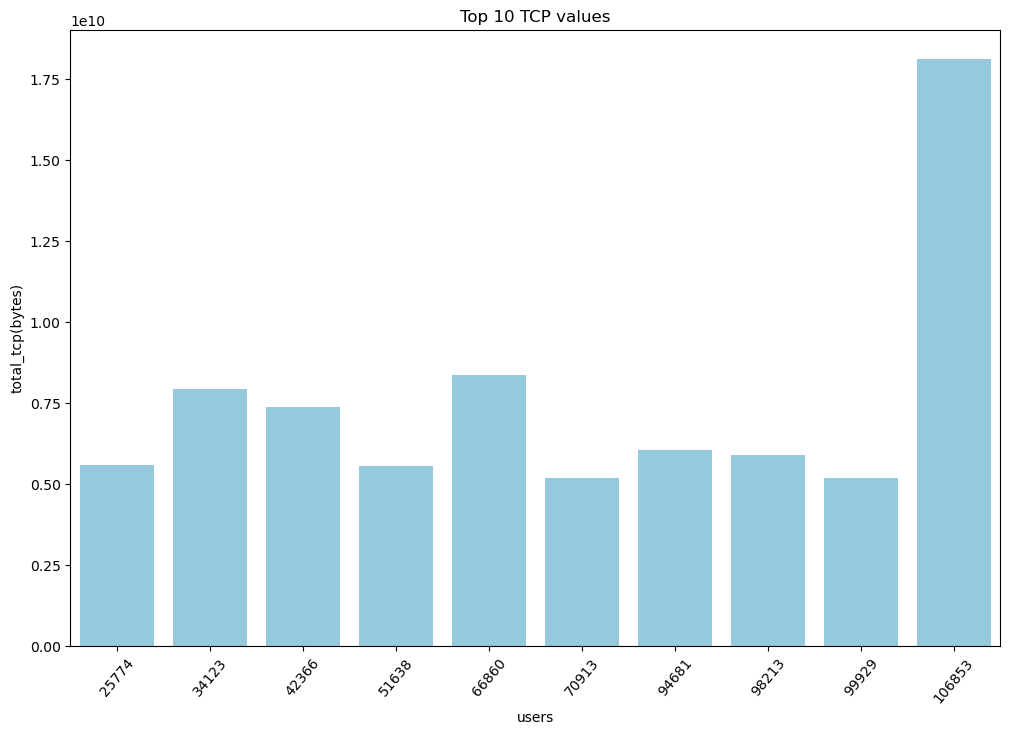

In [146]:
# top 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['total_tcp(bytes)'], color="skyblue").set(title = 'Top 10 TCP values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 TCP values'), Text(0.5, 0, 'users')]

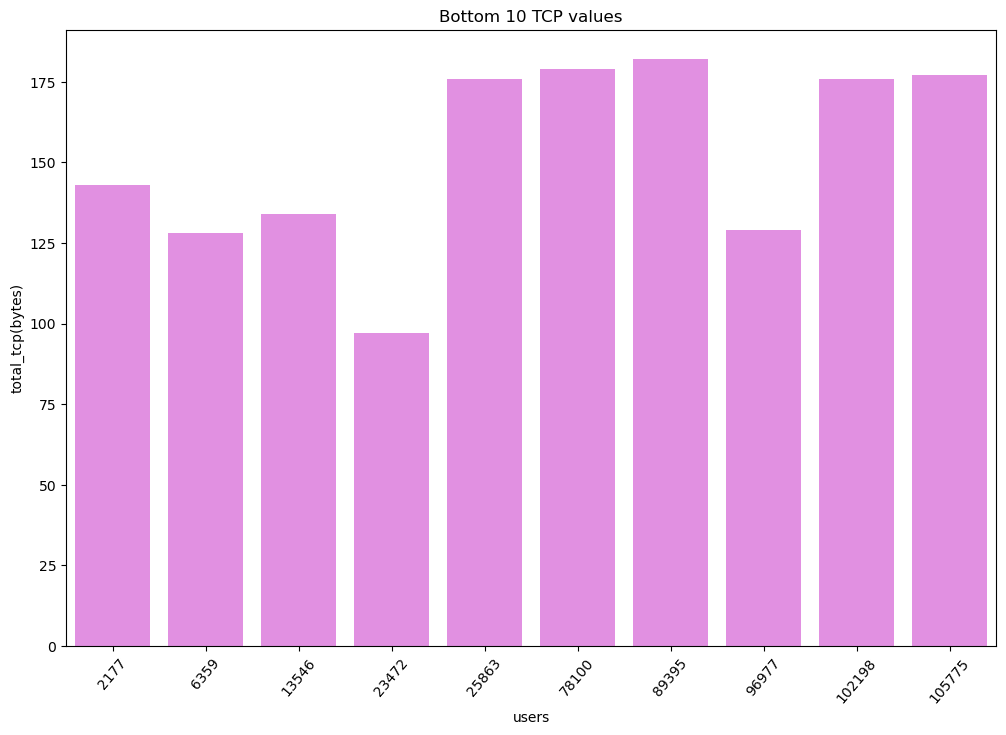

In [147]:
# bottom 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['total_tcp(bytes)'], color="violet").set(title = 'Bottom 10 TCP values', xlabel = 'users')

In [148]:
# rtt
a = agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).head(10)
b = agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).tail(10)
c = pd.DataFrame(agg_net_data['total_rtt(ms)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 rtt values'), Text(0.5, 0, 'users')]

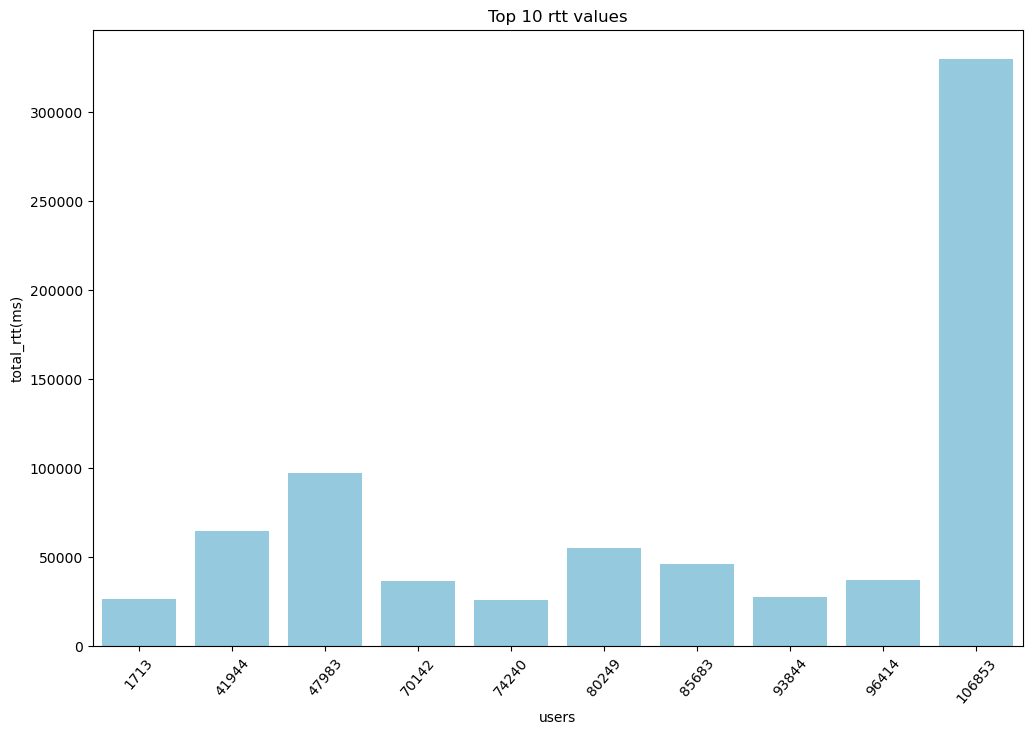

In [149]:
# top 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['total_rtt(ms)'], color="skyblue").set(title = 'Top 10 rtt values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 rtt values'), Text(0.5, 0, 'users')]

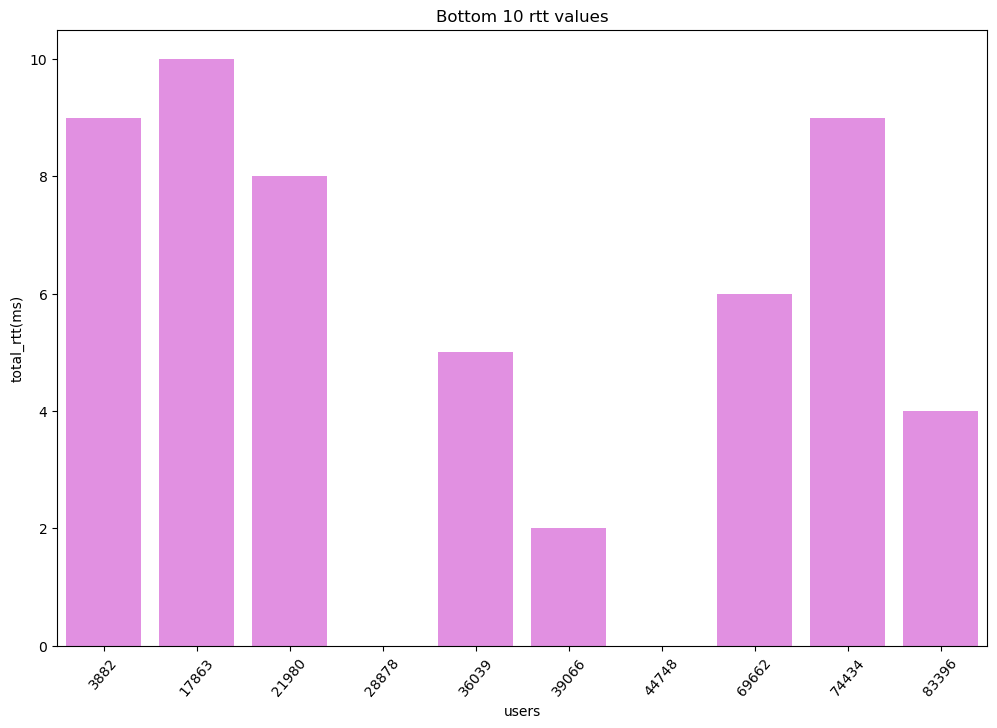

In [150]:
# bottom 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['total_rtt(ms)'], color="violet").set(title = 'Bottom 10 rtt values', xlabel = 'users')

In [151]:
# tp
a = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).head(10)
b = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).tail(10)
c = pd.DataFrame(agg_net_data['total_tp(kbps)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 tp values'), Text(0.5, 0, 'users')]

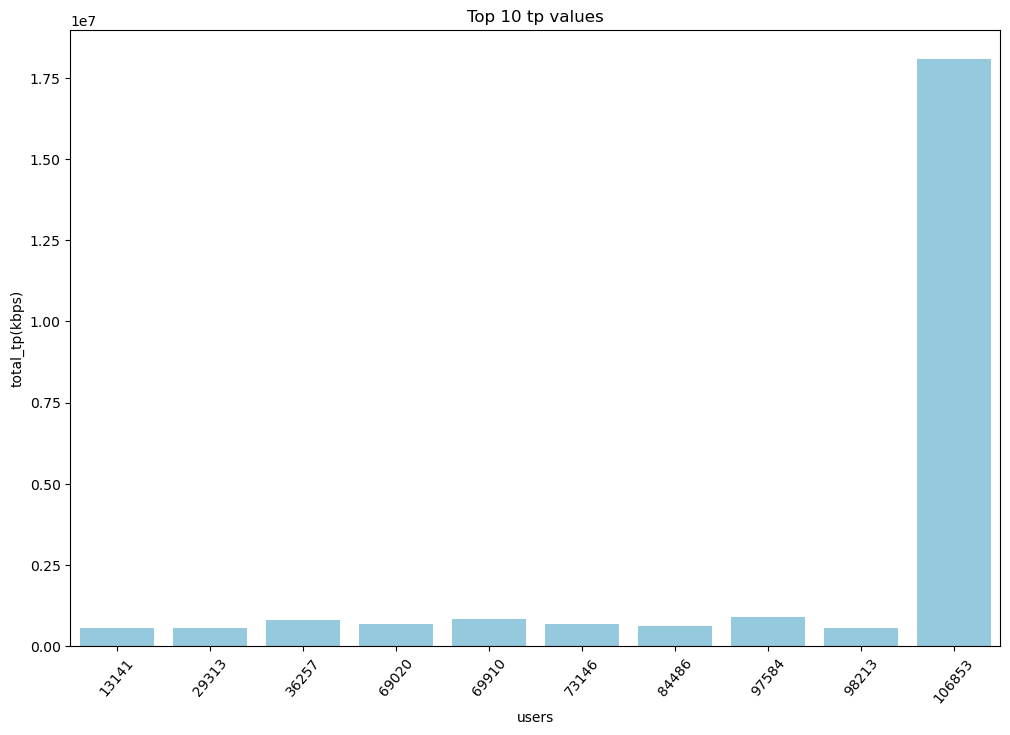

In [152]:
# top 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['total_tp(kbps)'], color="skyblue").set(title = 'Top 10 tp values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 tp values'), Text(0.5, 0, 'users')]

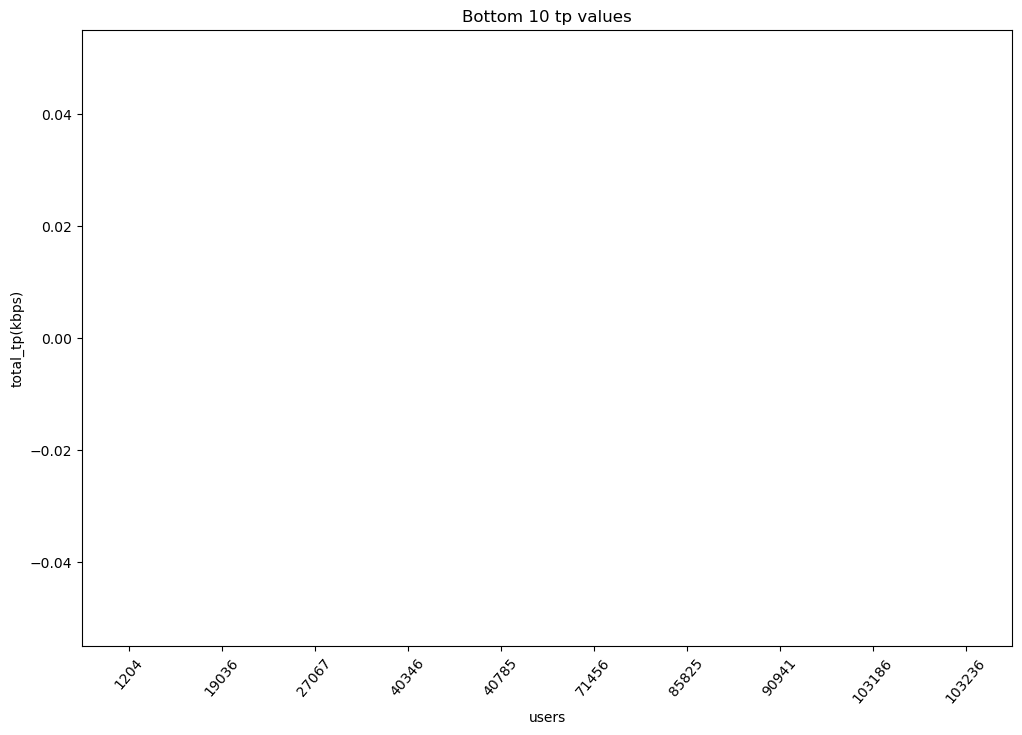

In [153]:
# bottom 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['total_tp(kbps)'], color="violet").set(title = 'Bottom 10 tp values', xlabel = 'users')

# Compute & report:

In [154]:
data['total_tp(kbps)'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
data['total_rtt(ms)'] = data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
data['total_tcp(bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']

handset_data = data[['Handset Type', 'total_tp(kbps)', 'total_tcp(bytes)']]
agg_handset_data = handset_data.groupby('Handset Type').mean()
agg_handset_data.columns = ['avg_tp_per_set', 'avg_tcp_per_set']
agg_handset_data.head()

avg_tp_per_set  avg_tcp_per_set
Handset Type                                                      
A-Link Telecom I. Cubot A5                23510.0     2.156957e+07
A-Link Telecom I. Cubot Note Plus          6699.0     6.162130e+05
A-Link Telecom I. Cubot Note S             8937.0     4.141173e+07
A-Link Telecom I. Cubot Nova              56217.0     1.371700e+05
A-Link Telecom I. Cubot Power             69468.0     8.041000e+03


 mu = 12400.38 and sigma = 14661.81



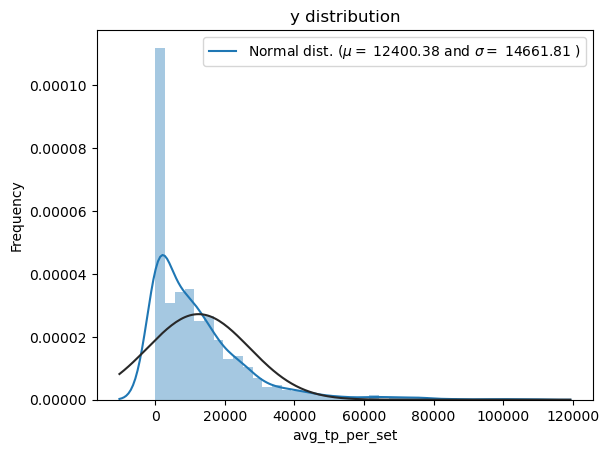

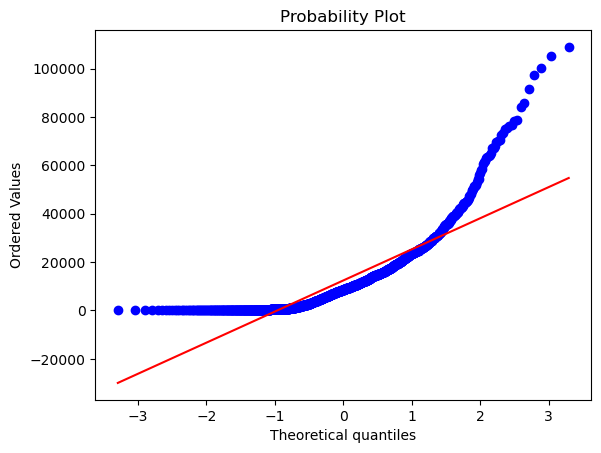

In [155]:
# Average throughput/handset ~ distribution
sns.distplot(agg_handset_data['avg_tp_per_set'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(agg_handset_data['avg_tp_per_set'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(agg_handset_data['avg_tp_per_set'], plot=plt)
plt.show()

# Heavily right tailed - Highly skewed

[Text(0.5, 1.0, 'Top 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

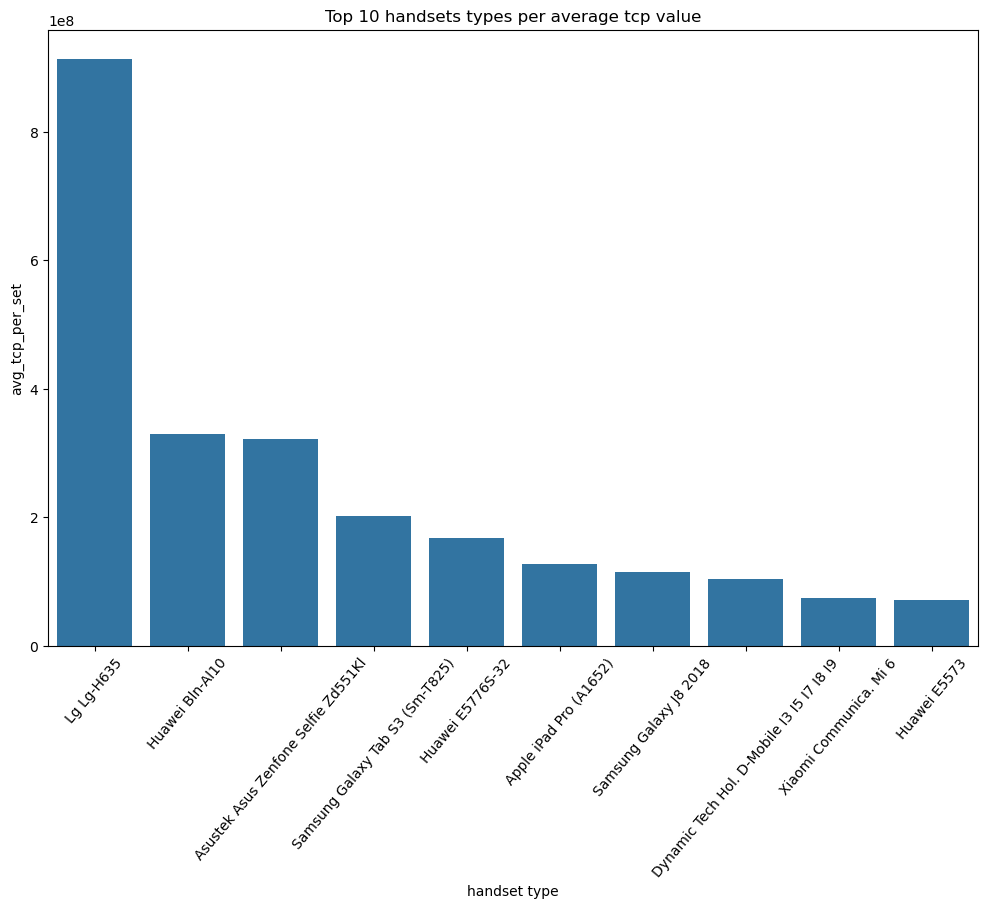

In [156]:
# The average TCP retransmission view per handset type and provide interpretation for your findings.
# aggregate function has already been applied 

# top 10 handsets per tcp average
a = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).head(10)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['avg_tcp_per_set']).set(title = 'Top 10 handsets types per average tcp value', xlabel = 'handset type')

# 6 of the handset types with highest average tcp values are from the top 3 handset manufacturers.

[Text(0.5, 1.0, 'Bottom 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

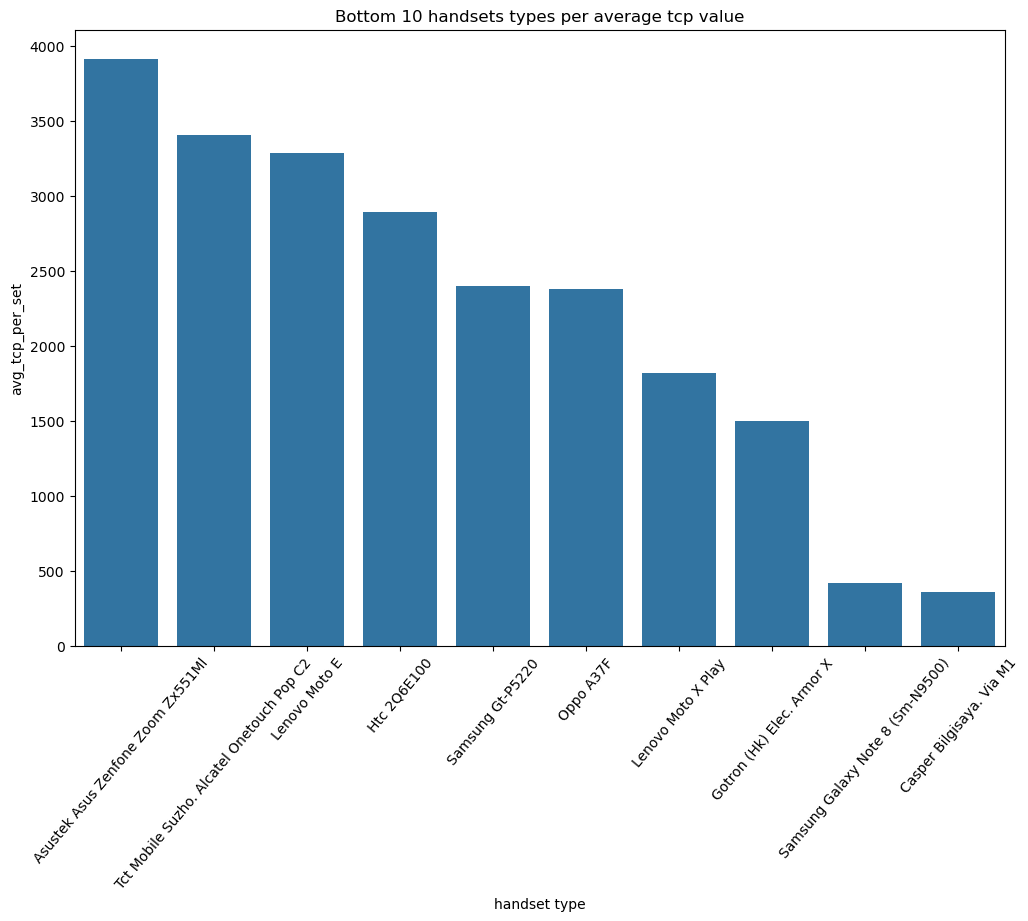

In [157]:
# bottom 10 handsets per tcp average
b = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).tail(10)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['avg_tcp_per_set']).set(title = 'Bottom 10 handsets types per average tcp value', xlabel = 'handset type')

# Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [158]:
cluster_data = agg_net_data[['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)',  'total_tcp(bytes)']]
norm_cluster_data = np.log1p(cluster_data)   #log transformation
norm_cluster_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)
0      0.693147        4.343805       3.850148         16.886794
1      0.693147        4.605170       3.465736         16.886794
2      0.693147        4.584967       4.855607         16.886794
3      0.693147        5.517453       4.442651         13.542028
4      1.098612       10.948084       4.787492         17.247574

In [159]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_cluster_data)
kmeans_data = kmeans.predict(norm_cluster_data)

In [160]:
# add the predicted clusters as a column in the df
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
0             1            76.0      46.000000      2.156957e+07         1
1             1            99.0      31.000000      2.156957e+07         1
2             1            97.0     127.458589      2.156957e+07         1
3             1           248.0      84.000000      7.607247e+05         1
4             2         56844.0     119.000000      3.094040e+07         0

In [161]:
#clusters df
cluster_1 = cluster_data[cluster_data.clusters == 0]
cluster_2 = cluster_data[cluster_data.clusters == 1]
cluster_3 = cluster_data[cluster_data.clusters == 2]

In [162]:
# understand the clusters
cluster_1.describe()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
count  28940.000000    2.894000e+04   28940.000000      2.894000e+04   28940.0
mean       2.057636    6.014967e+04     266.002908      6.097682e+07       0.0
std        6.357878    1.223090e+05    2002.192625      3.102842e+08       0.0
min        1.000000    1.157000e+03      17.000000      1.183841e+06       0.0
25%        1.000000    1.969475e+04      88.000000      1.080377e+07       0.0
50%        2.000000    4.286350e+04     149.000000      2.187979e+07       0.0
75%        2.000000    7.666925e+04     261.458589      3.490999e+07       0.0
max     1066.000000    1.807823e+07  329526.164724      1.810492e+10       0.0

In [163]:
cluster_2.describe()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
count  57867.000000    57867.000000   57867.000000      5.786700e+04   57867.0
mean       1.199181      161.199008     121.934653      2.522595e+07       1.0
std        0.500237      238.588215     721.290566      1.163534e+07       0.0
min        1.000000        0.000000       0.000000      2.398920e+05       1.0
25%        1.000000       77.000000      38.000000      2.156957e+07       1.0
50%        1.000000       99.000000      69.000000      2.156957e+07       1.0
75%        1.000000      132.000000     127.458589      2.156957e+07       1.0
max        9.000000     2340.000000   96924.000000      5.395976e+08       1.0

In [164]:
cluster_3.describe()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
count  20050.000000    20050.000000   20050.000000      2.005000e+04   20050.0
mean       1.050374    25462.671920     217.695715      5.505430e+05       2.0
std        0.247399    27976.354147     702.654298      5.070238e+05       0.0
min        1.000000       38.000000      19.000000      9.700000e+01       2.0
25%        1.000000     4776.000000      49.000000      7.432125e+04       2.0
50%        1.000000    16970.000000      72.000000      4.905455e+05       2.0
75%        1.000000    36855.250000     154.000000      7.920037e+05       2.0
max        5.000000   382871.000000   27278.000000      3.340765e+06       2.0

# Satisfaction Analysis

In [165]:
# the results of the 1st clustering
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10        0.693147              18.575290                20.593943
3.360100e+10        0.693147              19.015283                18.870862
3.360100e+10        0.693147              18.720558                20.205695
3.360101e+10        0.693147              17.725091                19.861276
3.360101e+10        1.098612              17.429248                21.099927

In [166]:
norm_agg_user_data.shape

(106857, 3)

In [167]:
print(norm_agg_user_data.columns)

Index(['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)'], dtype='object')


In [168]:
# Inspect DataFrame creation process
print(norm_agg_user_data.head())

               sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10        0.693147              18.575290                20.593943
3.360100e+10        0.693147              19.015283                18.870862
3.360100e+10        0.693147              18.720558                20.205695
3.360101e+10        0.693147              17.725091                19.861276
3.360101e+10        1.098612              17.429248                21.099927


In [169]:
# picking out the 4 cols
exp_data = net_data.drop(['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
                          'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'], axis = 1)
exp_data.head()


MSISDN/Number                 Handset Type  total_tp(kbps)  total_rtt(ms)  \
0   3.366496e+10   Samsung Galaxy A5 Sm-A520F            67.0      47.000000   
1   3.368185e+10  Samsung Galaxy J5 (Sm-J530)            42.0      70.000000   
2   3.376063e+10     Samsung Galaxy A8 (2018)            15.0     127.458589   
3   3.375034e+10                    undefined            88.0     127.458589   
4   3.369980e+10             Samsung Sm-G390F            15.0     127.458589   

   total_tcp(bytes)  
0      2.156957e+07  
1      2.156957e+07  
2      2.156957e+07  
3      2.156957e+07  
4      2.156957e+07

In [170]:
# groupby user
agg_exp_data = exp_data.groupby('MSISDN/Number').agg({'Handset Type':'count', 'total_tp(kbps)':'sum', 'total_rtt(ms)':'sum', 'total_tcp(bytes)':'sum'})
agg_exp_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)
MSISDN/Number                                                               
3.360100e+10              1            76.0      46.000000      2.156957e+07
3.360100e+10              1            99.0      31.000000      2.156957e+07
3.360100e+10              1            97.0     127.458589      2.156957e+07
3.360101e+10              1           248.0      84.000000      7.607247e+05
3.360101e+10              2         56844.0     119.000000      3.094040e+07

In [171]:
# normalize and perform kmeans
norm_agg_exp_data = np.log1p(agg_exp_data)
norm_agg_exp_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)
MSISDN/Number                                                               
3.360100e+10       0.693147        4.343805       3.850148         16.886794
3.360100e+10       0.693147        4.605170       3.465736         16.886794
3.360100e+10       0.693147        4.584967       4.855607         16.886794
3.360101e+10       0.693147        5.517453       4.442651         13.542028
3.360101e+10       1.098612       10.948084       4.787492         17.247574

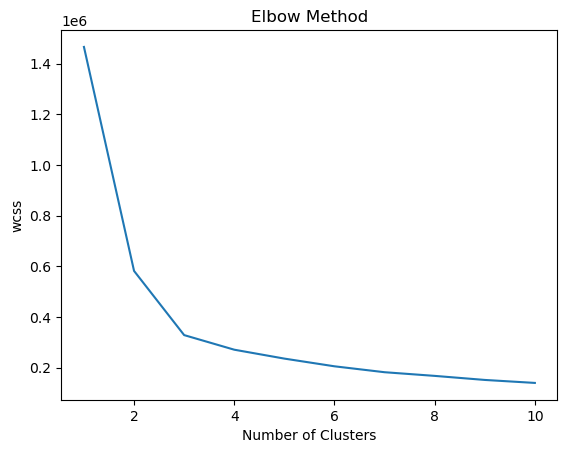

In [172]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_exp_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [173]:
# fit kmeans and identify least engaged cluster
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
k_means.fit(norm_agg_exp_data)
clusters=k_means.predict(norm_agg_exp_data)

norm_agg_exp_data['clusters'] = clusters
norm_agg_exp_data.clusters.value_counts()

clusters
1    57867
0    28940
2    20050
Name: count, dtype: int64

In [174]:
# fit kmeans
data1 = norm_agg_exp_data.drop(['clusters'], axis = 1)

km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
alldistances = km.fit_transform(data1) #returns euclidean distance btwn all datapoints to each cluster centroid

dist_df = pd.DataFrame(alldistances)
dist_0 = dist_df.iloc[:, 2].to_list() #pick out the centroid 0 distances
print(len(dist_0))
dist_0[:10]

106857


[6.814868587276857,
 6.6787230832893485,
 6.60434744190838,
 4.026412660363078,
 5.1931598848985585,
 4.6493376524916386,
 4.802669854549192,
 2.607971287206198,
 6.748606148074301,
 6.301787469726333]

In [175]:
# add the scores to the df
norm_agg_exp_data['experience_score'] = dist_0
exp_scores_data = norm_agg_exp_data.drop(['clusters'], axis = 1)
exp_scores_data.tail()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  \
MSISDN/Number                                                                  
3.379000e+10       0.693147        4.762174       3.713572         16.886794   
4.188282e+10       6.972606       16.710219      12.705414         23.619449   
3.197021e+12       0.693147        0.693147       4.855607         16.886794   
3.370000e+14       0.693147        3.526361       4.855607         16.886794   
8.823971e+14       0.693147        1.098612       4.855607         16.886794   

               experience_score  
MSISDN/Number                    
3.379000e+10           6.530370  
4.188282e+10          16.935922  
3.197021e+12           9.791549  
3.370000e+14           7.404896  
8.823971e+14           9.434855

In [176]:
print(exp_scores_data.shape)

(106857, 5)
